In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import sklearn.metrics as metrics


In [2]:
diabetes = load_diabetes()


In [3]:
diabetes.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)


In [5]:
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
df_diabetes['Target'] = diabetes.target  # add target column to the dataframe


In [ ]:
df_diabetes.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
def eda(df,target): #Exploratory Data Analysis 

    print(df.cov())
    for a in df.columns:
        sns.scatterplot(x=df[a],y= df[target])
        plt.show()
    #sns.pairplot(df)
    x = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    print(x.head())
    print(y.head())
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)    
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    print(x_train)
    print(x_test)
    return x_train, x_test, y_train, y_test  


             age       sex       bmi        bp        s1        s2        s3  \
age     0.002268  0.000394  0.000420  0.000761  0.000590  0.000497 -0.000170   
sex     0.000394  0.002268  0.000200  0.000547  0.000080  0.000323 -0.000860   
bmi     0.000420  0.000200  0.002268  0.000897  0.000566  0.000592 -0.000832   
bp      0.000761  0.000547  0.000897  0.002268  0.000550  0.000421 -0.000405   
s1      0.000590  0.000080  0.000566  0.000550  0.002268  0.002033  0.000117   
s2      0.000497  0.000323  0.000592  0.000421  0.002033  0.002268 -0.000445   
s3     -0.000170 -0.000860 -0.000832 -0.000405  0.000117 -0.000445  0.002268   
s4      0.000462  0.000753  0.000938  0.000584  0.001229  0.001496 -0.001675   
s5      0.000614  0.000340  0.001012  0.000892  0.001169  0.000722 -0.000904   
s6      0.000684  0.000472  0.000881  0.000885  0.000739  0.000659 -0.000621   
Target  0.689758  0.158085  2.152914  1.620722  0.778355  0.638967 -1.449309   

              s4        s5        s6   

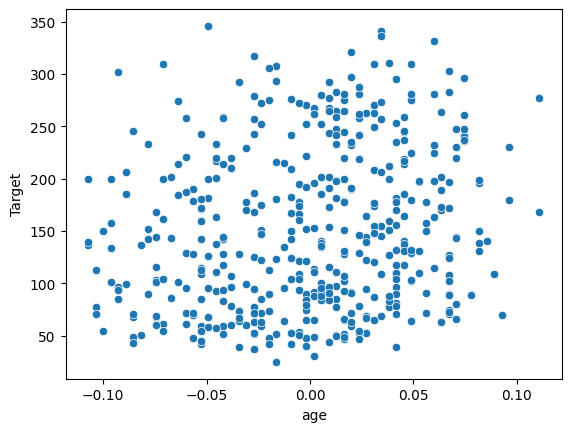

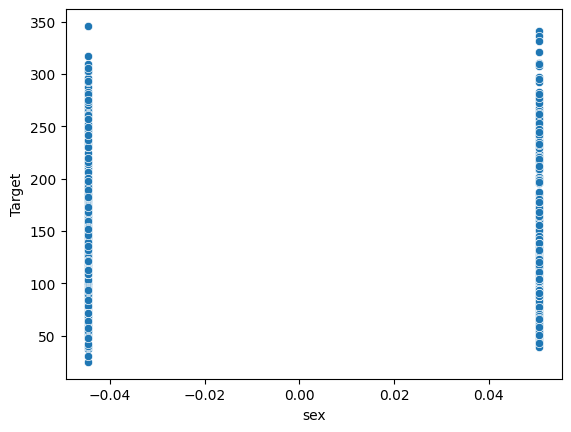

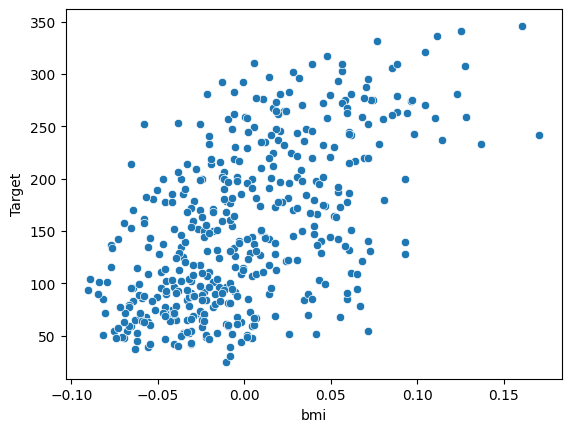

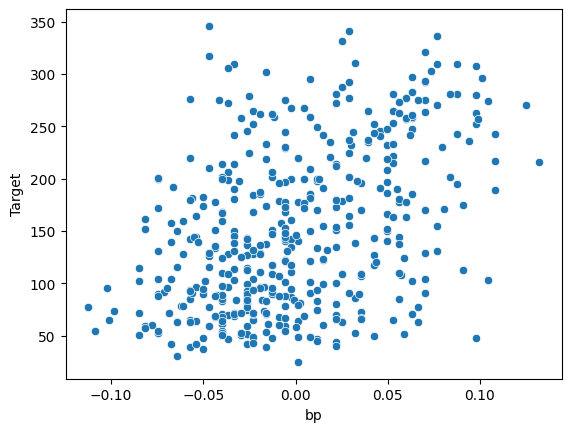

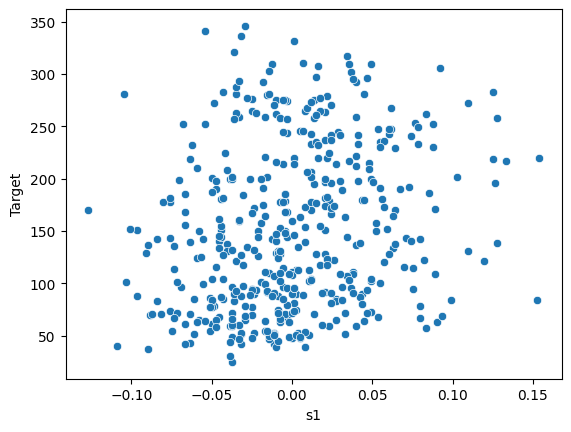

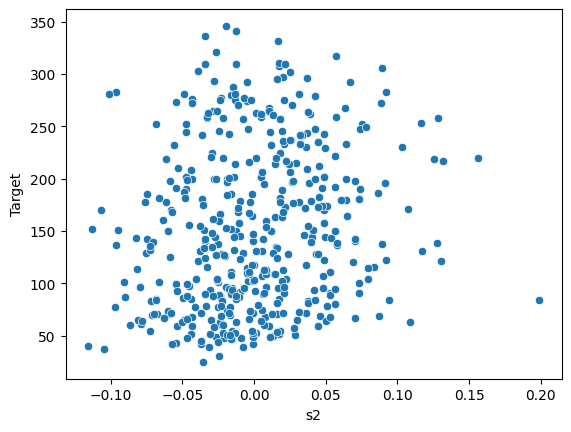

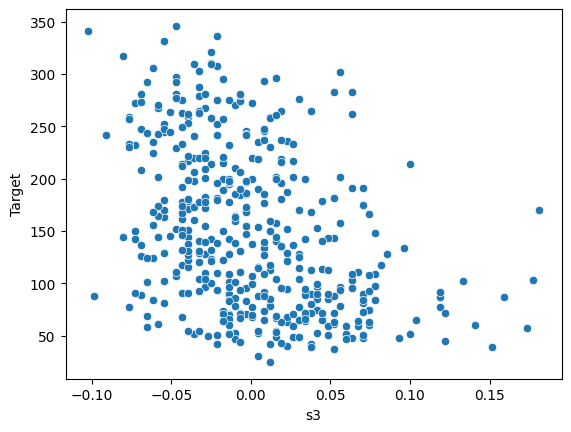

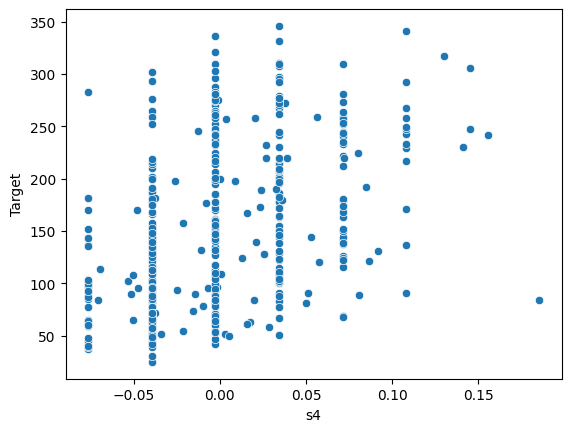

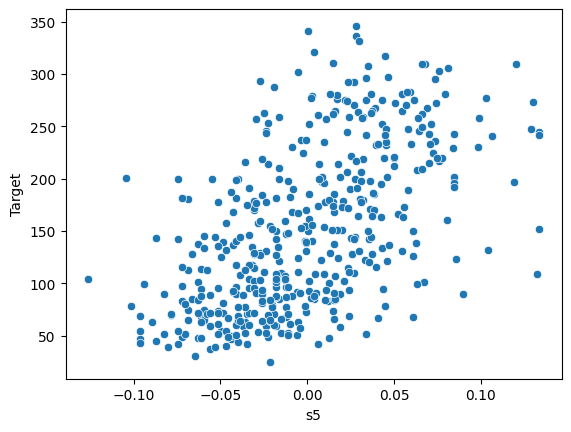

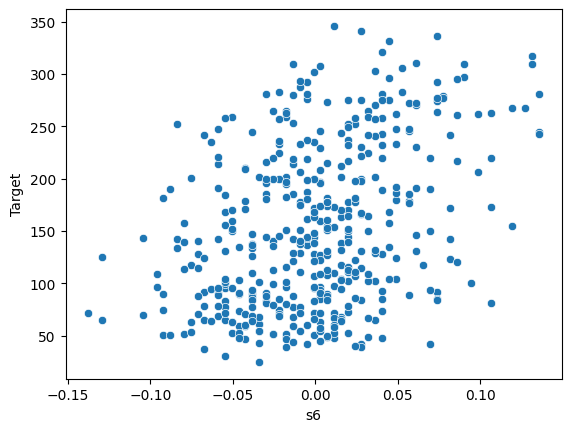

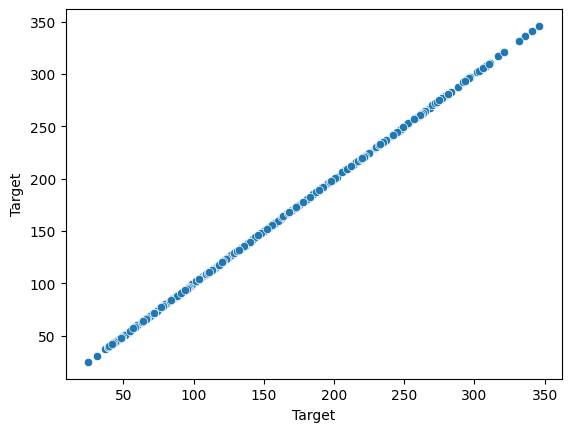

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Target, dtype: float64
[[ 0.24396182  1.02582922  0.06364526 ... -0.83072415  0.07510266
   1.49297091]
 [-2.23157066 -0.97482113 -1.56789685 ... -1.59866429 -0.8697201
  -0.10202047]
 [ 0.54402637  1.02582922 -0.70803006 ... -0.062784   -0.30602734
  -1.02543653]
 ...
 [ 1.21917159 

In [9]:
x_train, x_test, y_train, y_test=eda(df_diabetes,'Target')


In [10]:
def LinearReg(x_train, x_test, y_train, y_test):
    lr1 = LinearRegression()
    lr1.fit(x_train, y_train)
    y_pred = lr1.predict(x_test)
    # print(y_pred)
    # print(y_test)
    print(lr1.coef_)
    print(lr1.intercept_)
    print(lr1.get_params())
    residuals = y_test - y_pred
    sns.displot(residuals,kind='kde')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
    return y_pred, y_test


[ -1.721465   -11.5856942   27.51069174  14.3712086  -31.22139382
  15.26518393   1.16794747   8.18446857  35.83753415   2.12323129]
151.60623229461757
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Mean Absolute Error: 46.17358500370478
Mean Squared Error: 3424.259334298691
Root Mean Squared Error: 58.51717127731561


(array([238.46949509, 248.92812015, 164.05732579, 120.30774826,
        187.42483427, 259.04746969, 113.55788482, 188.07762807,
        149.49521726, 236.00758247, 172.24561893, 178.87936198,
        109.16034679,  92.13333574, 243.32766187,  87.35445583,
        155.72165684,  66.98992013, 100.42233598, 218.0957236 ,
        196.6646301 , 161.2972646 , 161.70870434, 156.52404017,
        197.88770177, 167.58280539, 120.7427979 ,  84.84033238,
        192.03438449, 160.60496231, 175.17348034,  84.22759674,
        145.80002729, 145.97264454, 140.96436257, 197.00423168,
        165.94319214, 190.6597389 , 128.22361933, 206.41497077,
         84.3575017 , 164.02262498, 144.10639773, 184.68996616,
        177.80076449,  74.33261184, 143.36644877, 138.68063137,
        120.80857573, 234.34288711, 161.94132344,  74.54325994,
        154.71683591, 156.78815442, 237.41798756, 174.23210042,
        190.87871793, 118.98140389, 132.20521501, 168.52914416,
        214.73950634, 171.42284128, 157.

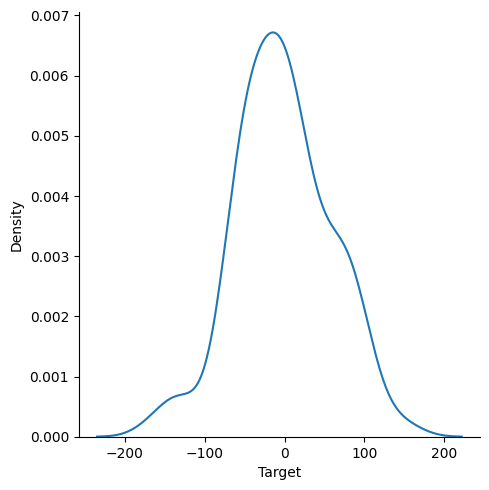

In [11]:
LinearReg(x_train, x_test, y_train, y_test)


In [12]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Target'] = housing.target
df_housing.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


               MedInc     HouseAge    AveRooms  AveBedrms    Population  \
MedInc       3.609323    -2.846140    1.536568  -0.055858  1.040098e+01   
HouseAge    -2.846140   158.396260   -4.772882  -0.463718 -4.222271e+03   
AveRooms     1.536568    -4.772882    6.121533   0.993868 -2.023337e+02   
AveBedrms   -0.055858    -0.463718    0.993868   0.224592 -3.552723e+01   
Population  10.400979 -4222.270582 -202.333712 -35.527225  1.282470e+06   
AveOccup     0.370289     1.724298   -0.124689  -0.030424  8.217120e+02   
Latitude    -0.323860     0.300346    0.562235   0.070575 -2.631378e+02   
Longitude   -0.057765    -2.728244   -0.136518   0.012670  2.263778e+02   
Target       1.508475     1.533988    0.433826  -0.025539 -3.221249e+01   

              AveOccup    Latitude   Longitude     Target  
MedInc        0.370289   -0.323860   -0.057765   1.508475  
HouseAge      1.724298    0.300346   -2.728244   1.533988  
AveRooms     -0.124689    0.562235   -0.136518   0.433826  
AveBedrms

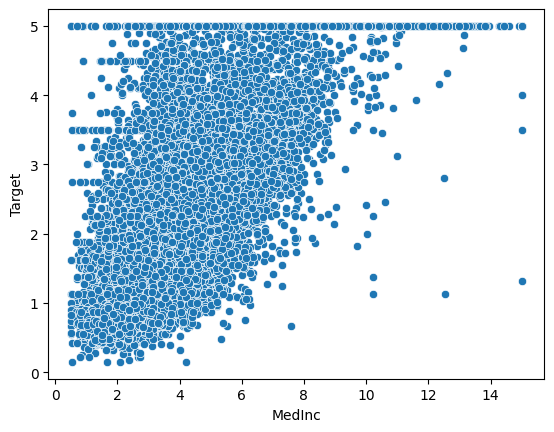

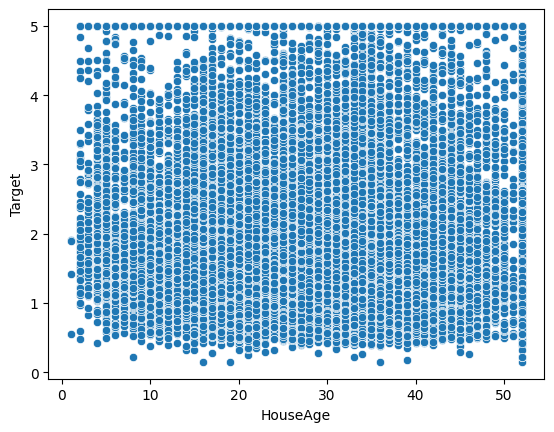

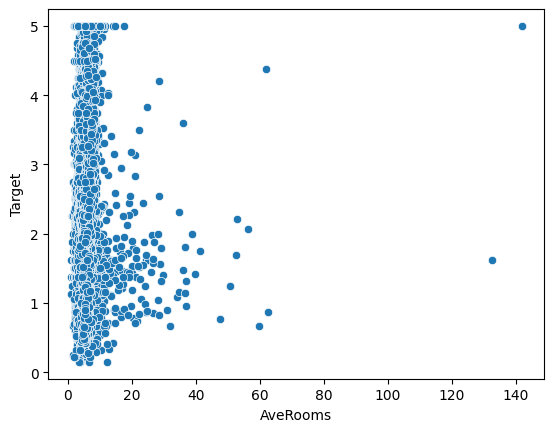

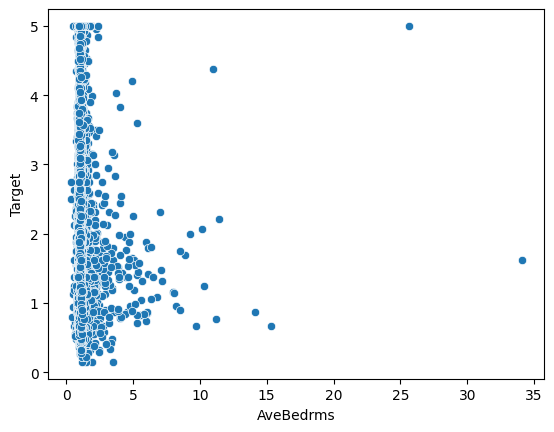

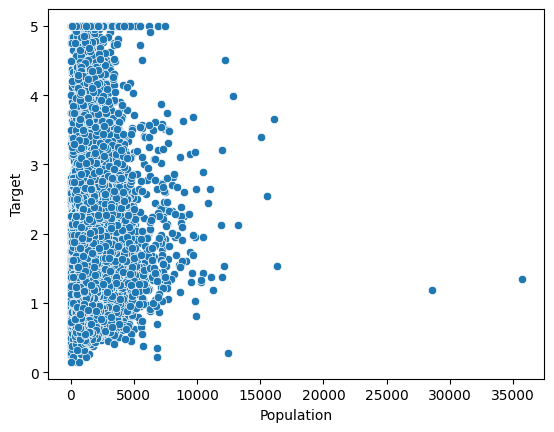

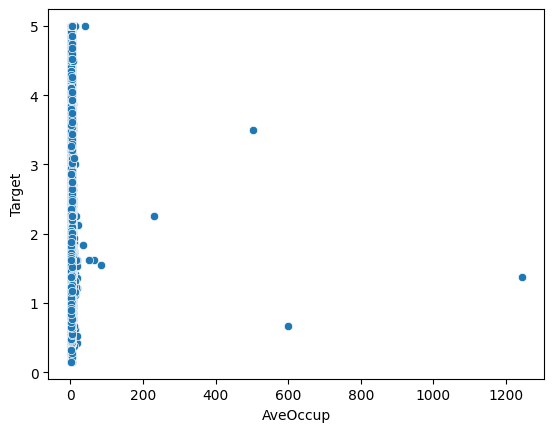

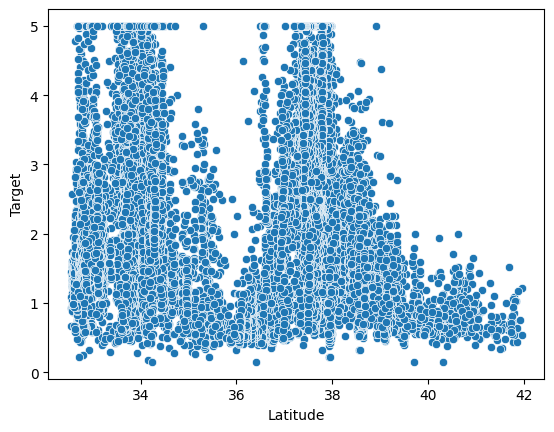

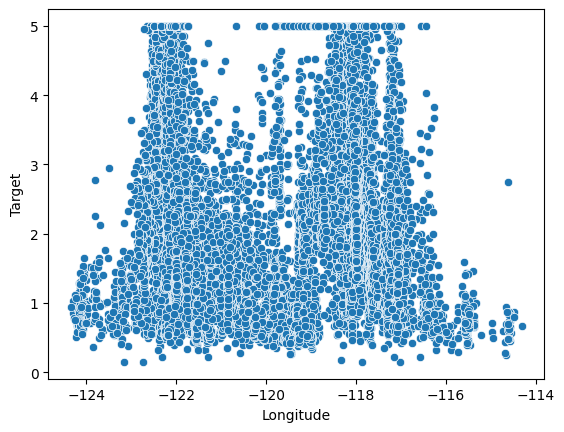

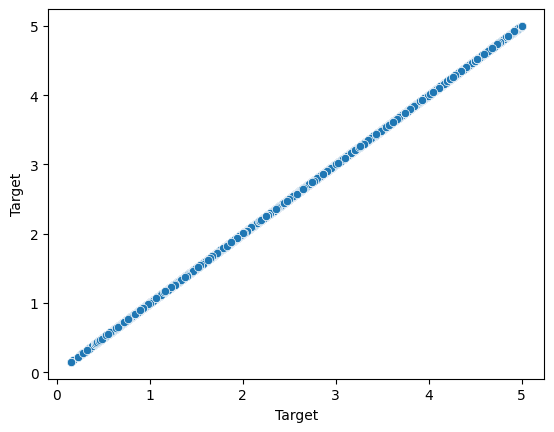

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64
[[ 0.19001247 -1.79507596  0.90771428 ...  0.07408222 -0.8400624
   1.00389865]
 [ 0.26931072  1.85553889 -0.04200187 ...  0.04527606  0.98536392
  -1.43477229]
 [ 0.02989505 -0.20785212 -0.30282448 ... -0.03933216 -0.8400624
   0.77948108]
 ...
 [-0.35589721  0.18895385 -0.70992683 ... -0.19238342  0.44709718
  -1.1654712 ]
 [ 0.92053182  0.42703742 -0.35350337 ... 

In [13]:
x_train, x_test, y_train, y_test=eda(df_housing,'Target')


[ 0.82624793  0.1171006  -0.24891059  0.29038746 -0.00864349 -0.03056429
 -0.90042112 -0.87058566]
2.0724989589389438
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Mean Absolute Error: 0.5351261336554506
Mean Squared Error: 0.5289841670367208
Root Mean Squared Error: 0.7273129773603114


(array([2.28110738, 2.79009128, 1.90332794, ..., 0.8418697 , 2.7984953 ,
        2.21779325]),
 14740    1.369
 10101    2.413
 20566    2.007
 2670     0.725
 15709    4.600
          ...  
 6655     1.695
 3505     2.046
 1919     1.286
 1450     2.595
 4148     1.676
 Name: Target, Length: 4128, dtype: float64)

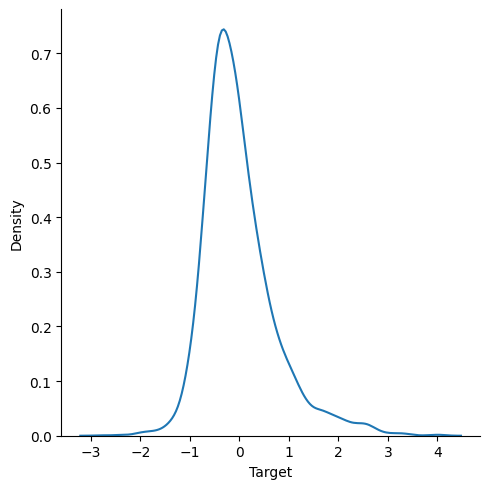

In [14]:
LinearReg(x_train, x_test, y_train, y_test)


In [15]:
from sklearn.datasets import load_iris
iris=load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['Target'] = iris.target  # add target column to the dataframe
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   
Target                      0.530872         -0.152349           1.372483   

                   petal width (cm)    Target  
sepal length (cm)          0.516271  0.530872  
sepal width (cm)          -0.121639 -0.152349  
petal length (cm)          1.295609  1.372483  
petal width (cm)           0.581006  0.597315  
Target                     0.597315  0.671141  


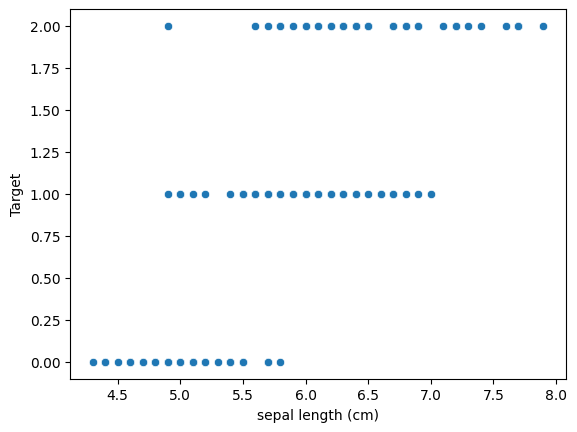

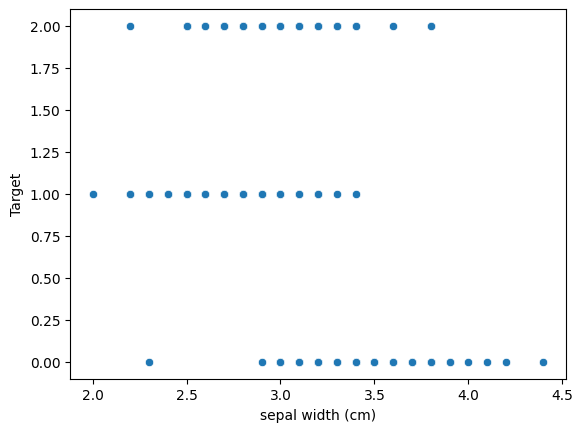

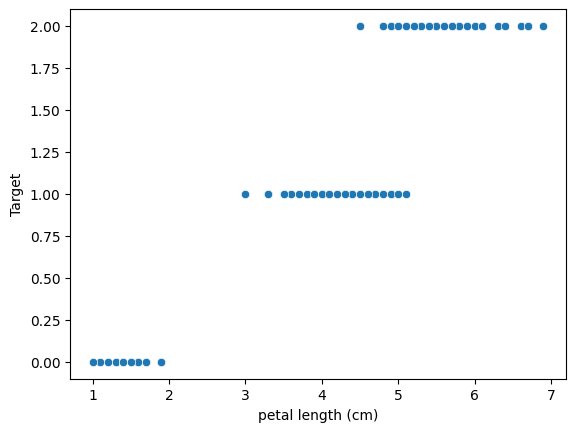

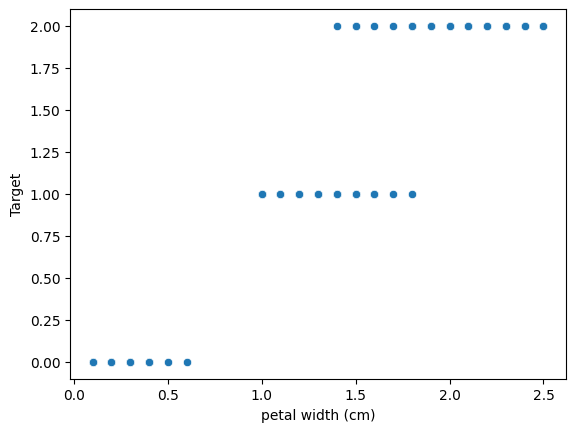

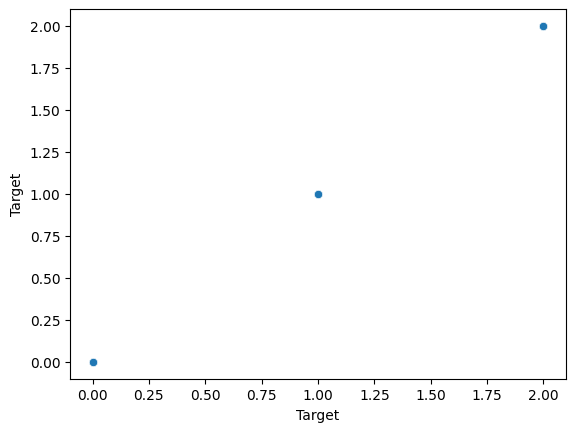

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64
[[ 0.61303014  0.10850105  0.94751783  0.736072  ]
 [-0.56776627 -0.12400121  0.38491447  0.34752959]
 [-0.80392556  1.03851009 -1.30289562 -1.33615415]
 [ 0.25879121 -0.12400121  0.60995581  0.736072  ]
 [ 0.61303014 -0.58900572  1.00377816  1.25412853]
 [-0.80392556 -0.82150798  0.04735245  0.21801546]
 [-0.21352735  1.73601687 -1.19037495 -1.20664002]
 [ 0.14071157 -0.82150798  0.72247648  0.47704373]
 [ 0.02263193 -0.12400121  0.21613346  0.34752959]
 [-0.09544771 -1.054010

In [16]:
x_train, x_test, y_train, y_test=eda(df_iris,'Target')  


[-0.09000309 -0.01708388  0.40693384  0.47194134]
1.0416666666666665
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Mean Absolute Error: 0.18641707995607312
Mean Squared Error: 0.05092322206134322
Root Mean Squared Error: 0.22566174257357674


(array([ 2.06844113,  0.96345869, -0.14707913,  1.81304847, -0.03927091,
         2.26261445, -0.02790835,  1.31919261,  1.28225236,  1.11236814,
         1.54774304,  1.3013147 ,  1.21150471,  1.32946956,  1.32977882,
        -0.12060477,  1.35574095,  1.21453128,  0.03610115, -0.02518356,
         1.79941543,  1.39427904,  0.07356109,  0.02146025,  1.59050985,
        -0.11917603,  0.14803648,  1.16645127,  0.90550234,  0.10586947]),
 114    2
 62     1
 33     0
 107    2
 7      0
 100    2
 40     0
 86     1
 76     1
 71     1
 134    2
 51     1
 73     1
 54     1
 63     1
 37     0
 78     1
 90     1
 45     0
 16     0
 121    2
 66     1
 24     0
 8      0
 126    2
 22     0
 44     0
 97     1
 93     1
 26     0
 Name: Target, dtype: int64)

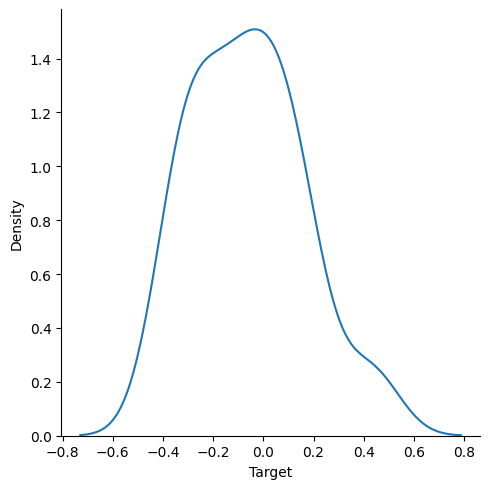

In [17]:
LinearReg(x_train, x_test, y_train, y_test)


In [18]:
from sklearn.datasets import load_wine
wine=load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['Target'] = wine.target  # add target column to the dataframe
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


                                 alcohol  malic_acid        ash  \
alcohol                         0.659062    0.085611   0.047115   
malic_acid                      0.085611    1.248015   0.050277   
ash                             0.047115    0.050277   0.075265   
alcalinity_of_ash              -0.841093    1.076332   0.406208   
magnesium                       3.139878   -0.870780   1.122937   
total_phenols                   0.146887   -0.234338   0.022146   
flavanoids                      0.192033   -0.458630   0.031535   
nonflavanoid_phenols           -0.015754    0.040733   0.006358   
proanthocyanins                 0.063518   -0.141147   0.001516   
color_intensity                 1.028283    0.644838   0.164654   
hue                            -0.013313   -0.143326  -0.004682   
od280/od315_of_diluted_wines    0.041698   -0.292447   0.000762   
proline                       164.567185  -67.548867  19.319739   
Target                         -0.206515    0.379039  -0.01055

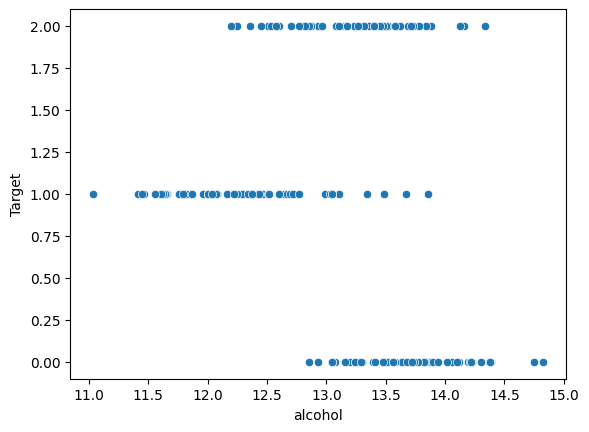

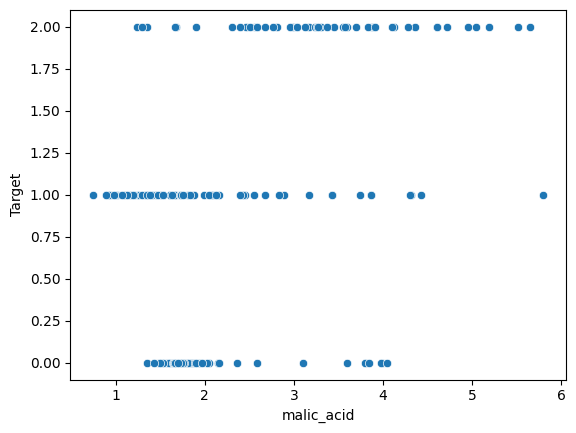

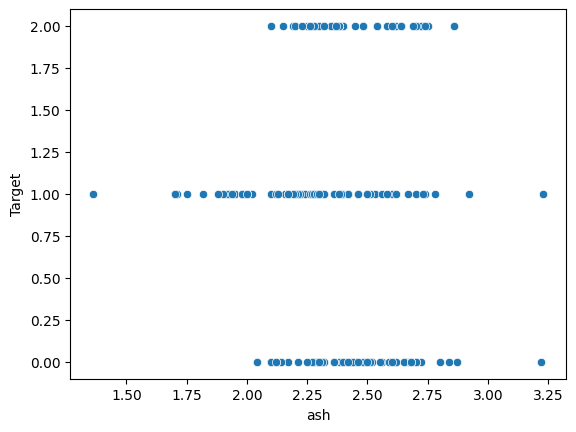

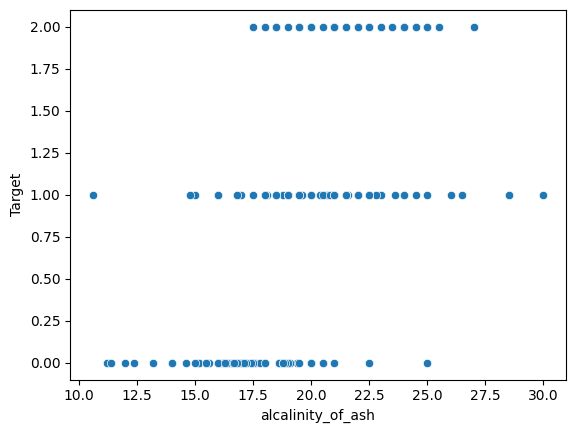

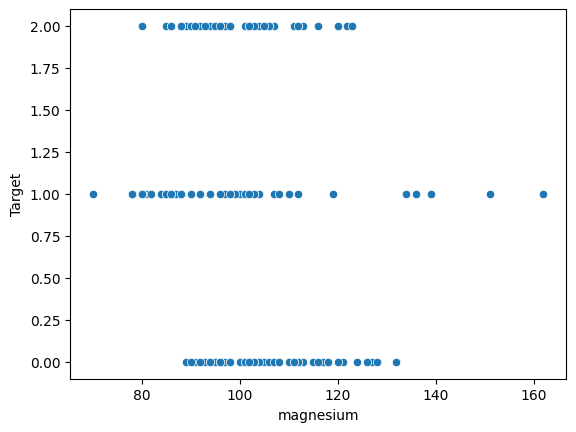

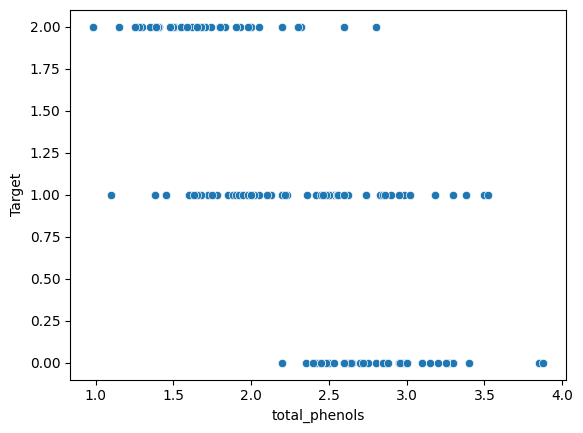

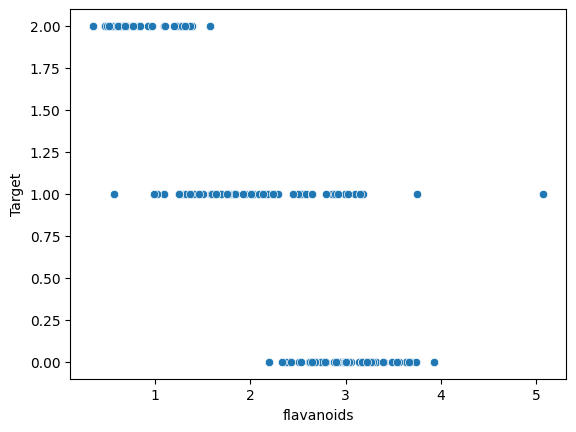

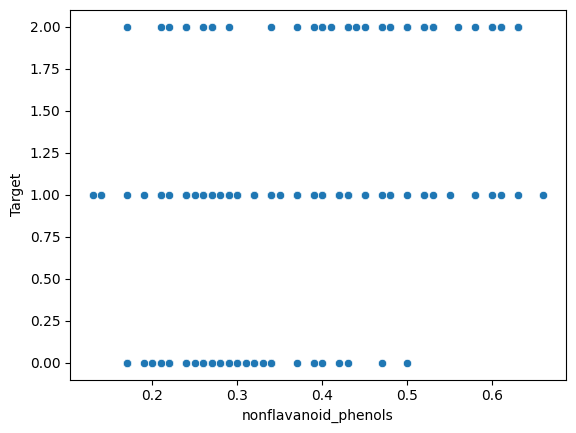

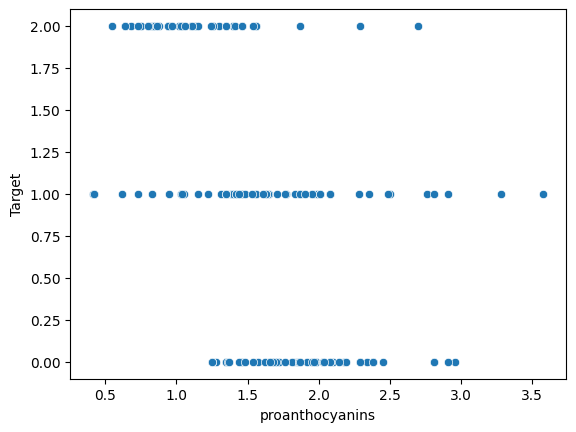

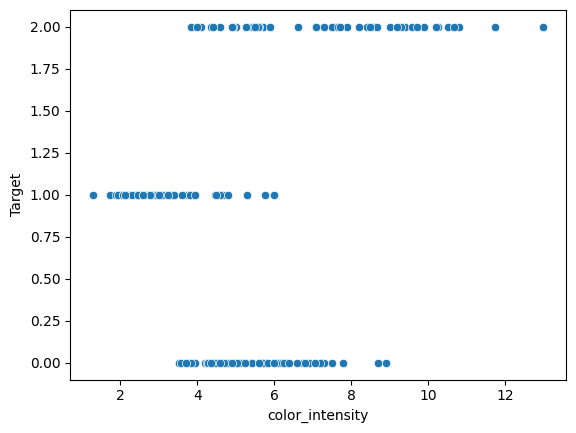

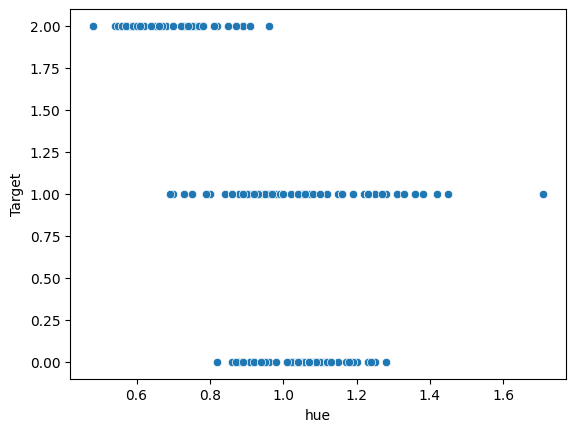

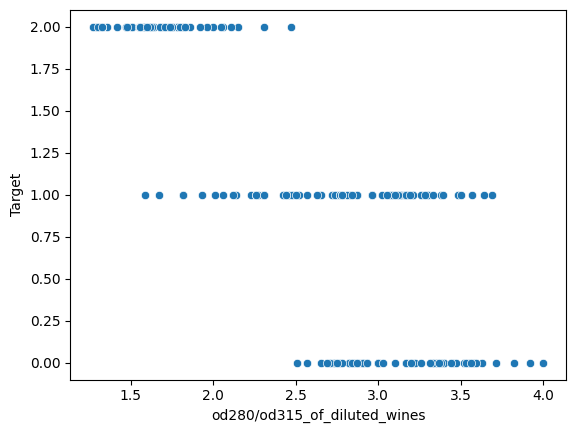

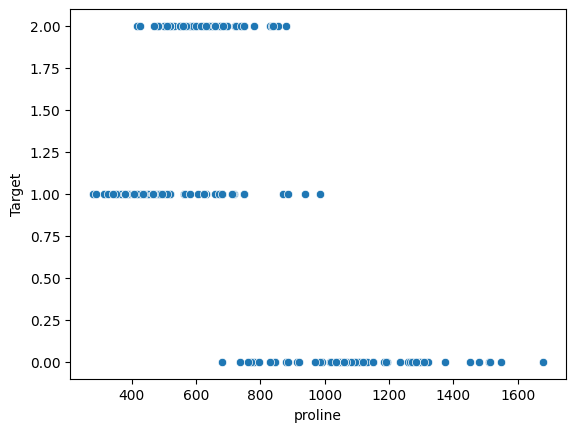

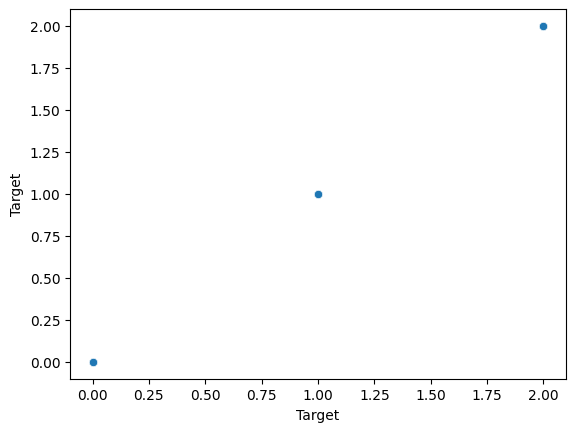

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [19]:
x_train, x_test, y_train, y_test=eda(df_wine,'Target')


[-0.06132915  0.03717972 -0.02687345  0.11351856  0.00125024  0.13772241
 -0.47168977 -0.05457828  0.04697326  0.12795317 -0.02514431 -0.21901846
 -0.20523492]
0.9788732394366201
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Mean Absolute Error: 0.2625947194926848
Mean Squared Error: 0.11926651196023665
Root Mean Squared Error: 0.3453498399597669


(array([ 0.13456913,  2.08929439,  0.87396631,  0.50083299,  0.95854797,
        -0.14054782, -0.08644665,  2.16604925,  0.72646695,  1.11990948,
         1.4686175 ,  2.06577711, -0.19554484,  0.42583092,  1.88579133,
         0.8897033 ,  0.07965492, -0.47751579,  1.50868655, -0.15131414,
         0.47968569,  0.42420933,  0.58625156,  0.69713137,  1.22992051,
         1.07211561,  0.74857703,  1.1994027 ,  0.76278552,  1.99673191,
        -0.071002  ,  0.24293131,  1.21037096,  0.27025637,  0.04196499,
         0.3026773 ]),
 54     0
 151    2
 63     1
 55     0
 123    1
 121    1
 7      0
 160    2
 106    1
 90     1
 141    2
 146    2
 5      0
 98     1
 168    2
 80     1
 33     0
 18     0
 61     1
 51     0
 66     1
 37     0
 4      0
 104    1
 60     1
 111    1
 126    1
 86     1
 112    1
 164    2
 26     0
 56     0
 129    1
 45     0
 8      0
 44     0
 Name: Target, dtype: int64)

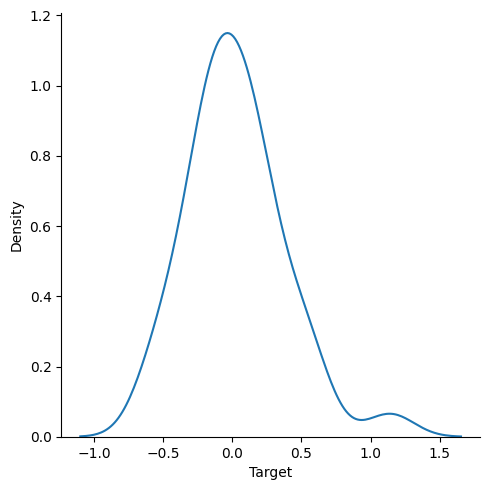

In [20]:
LinearReg(x_train, x_test, y_train, y_test)


In [21]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['Target'] = cancer.target  # add target column to the dataframe
df_cancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


                         mean radius  mean texture  mean perimeter  \
mean radius                12.418920      4.907582       85.447142   
mean texture                4.907582     18.498909       34.439759   
mean perimeter             85.447142     34.439759      590.440480   
mean area                1224.483409    485.993787     8435.772345   
mean smoothness             0.008454     -0.001415        0.070836   
mean compactness            0.094197      0.053767        0.714714   
mean concavity              0.190128      0.103692        1.387234   
mean concave points         0.112475      0.048977        0.802360   
mean symmetry               0.014273      0.008419        0.121922   
mean fractal dimension     -0.007754     -0.002321       -0.044859   
radius error                0.663650      0.329037        4.661401   
texture error              -0.189189      0.916695       -1.162988   
perimeter error             4.803550      2.449449       34.053028   
area error          

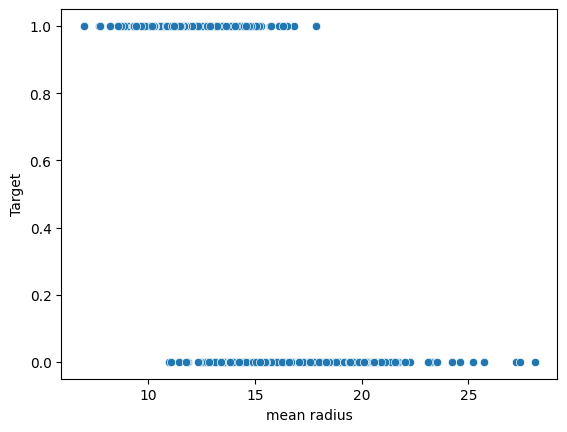

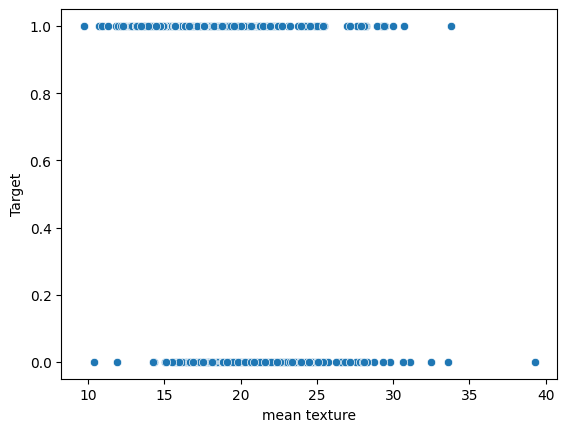

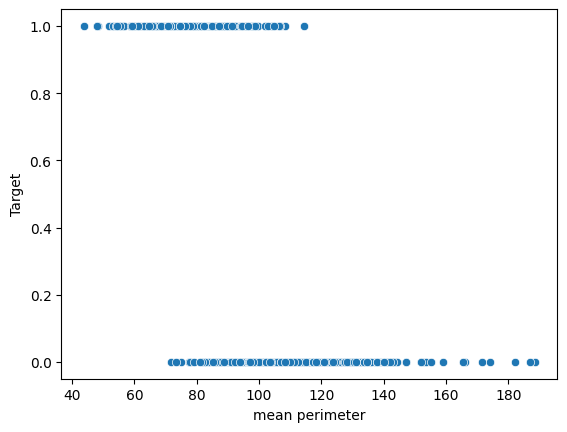

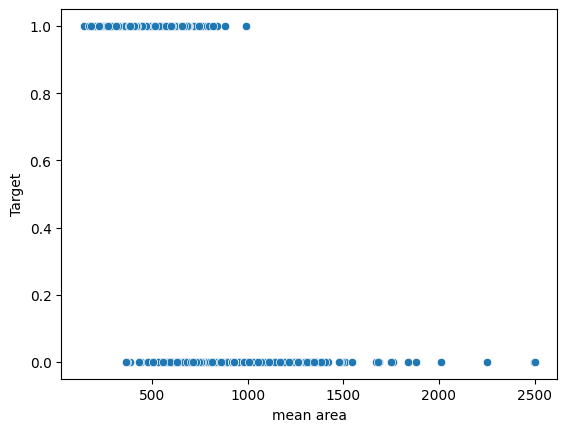

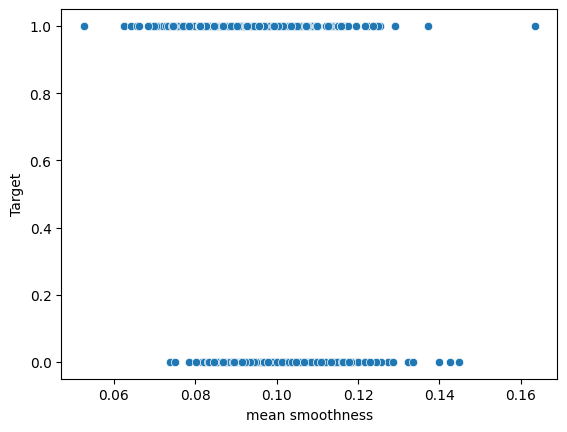

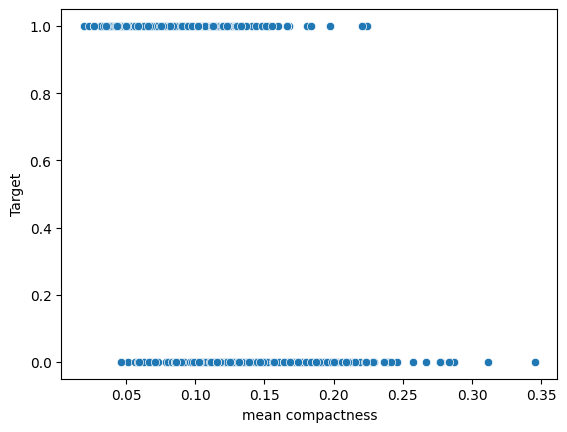

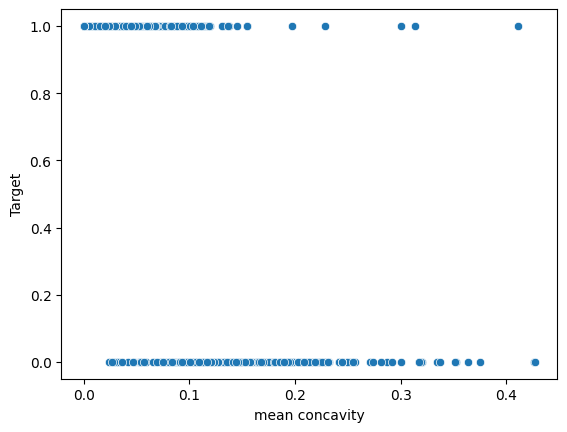

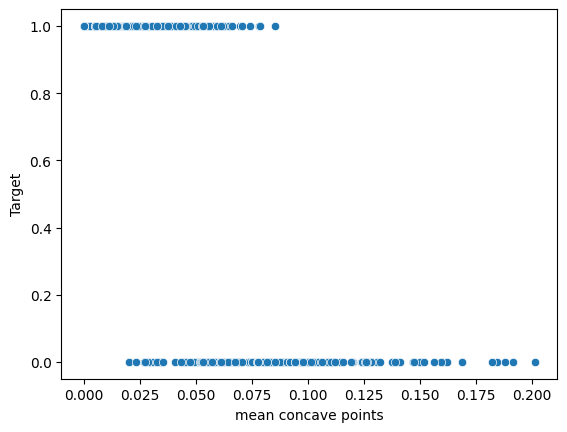

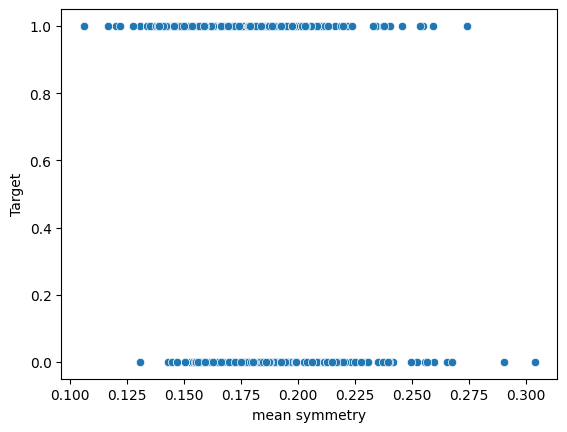

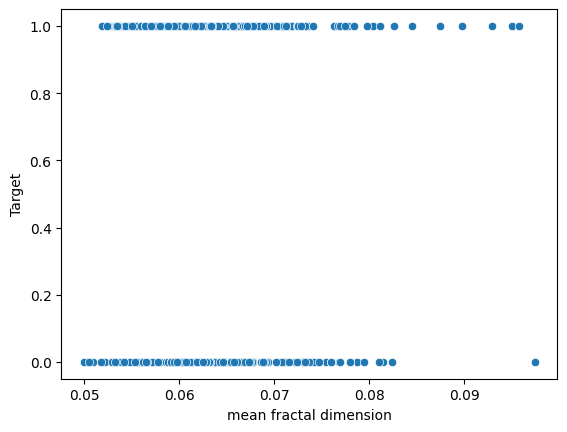

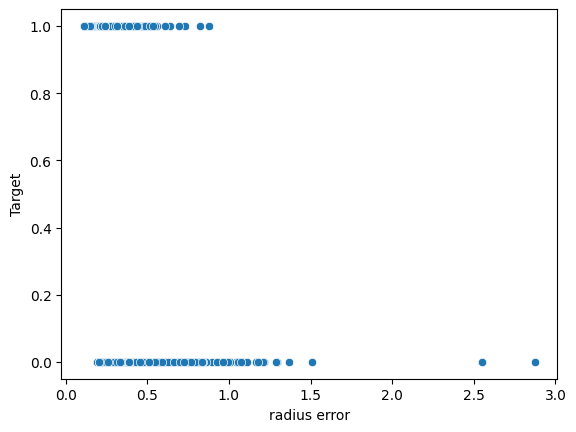

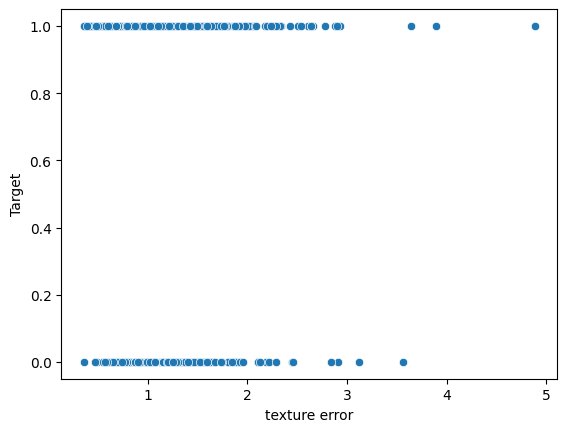

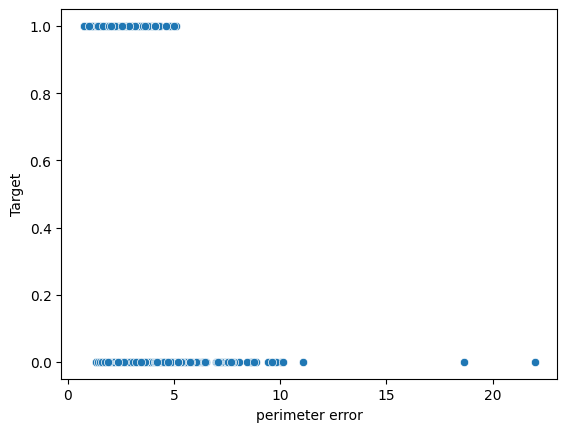

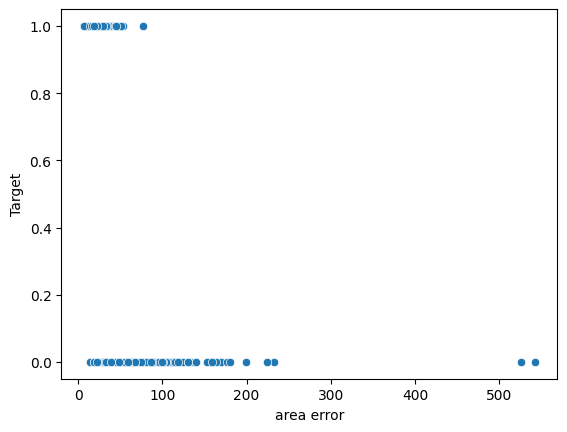

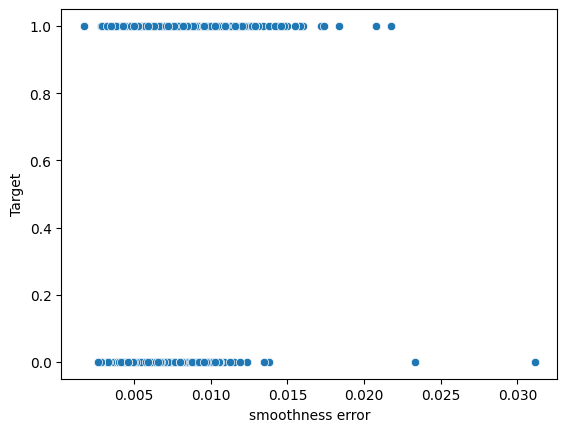

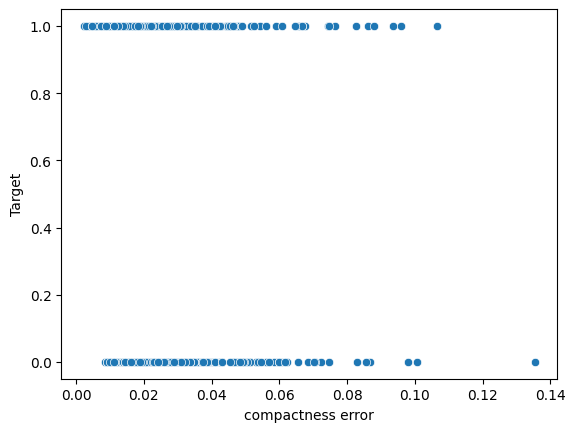

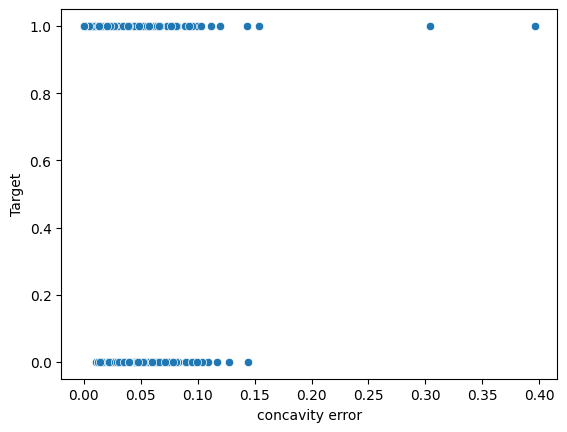

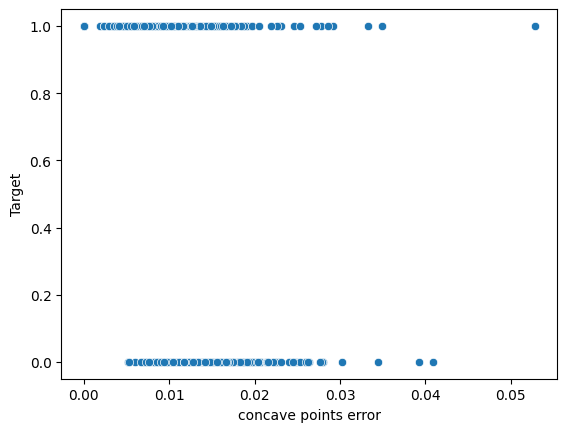

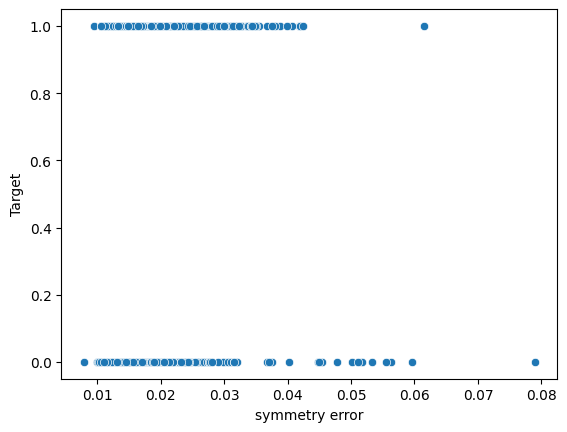

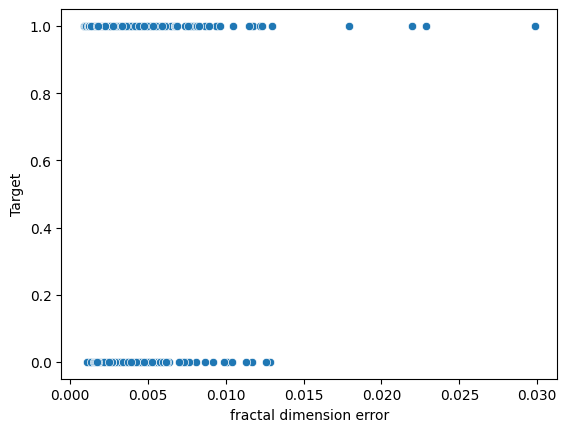

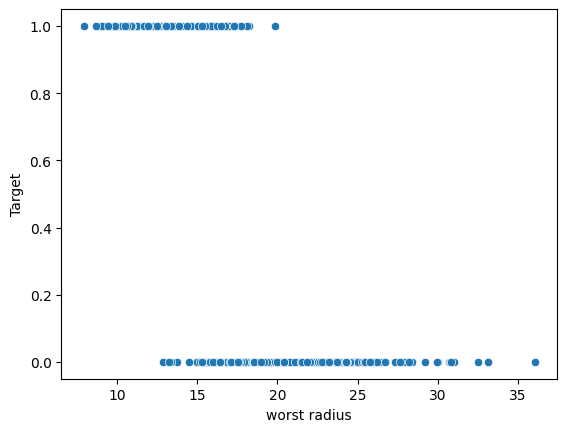

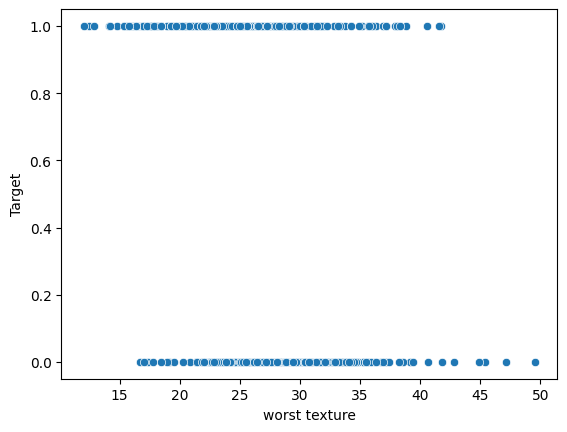

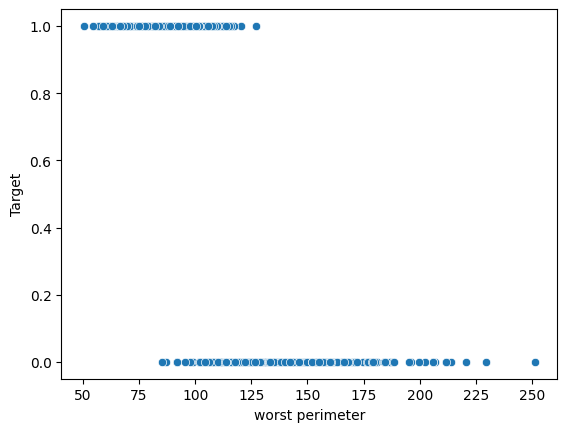

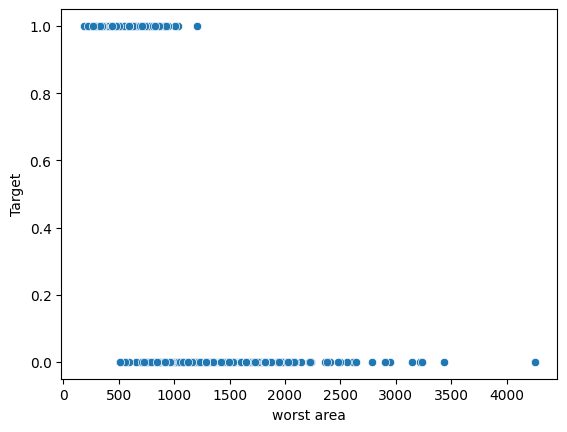

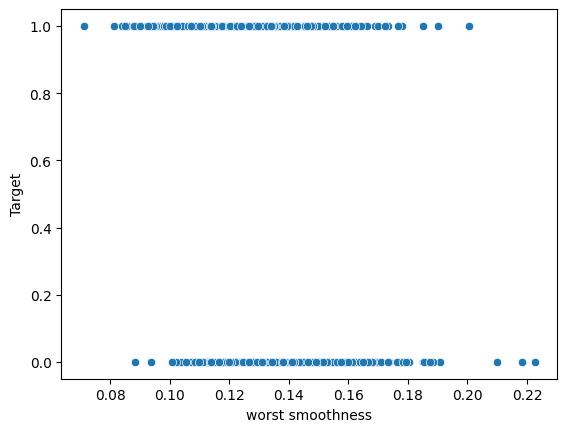

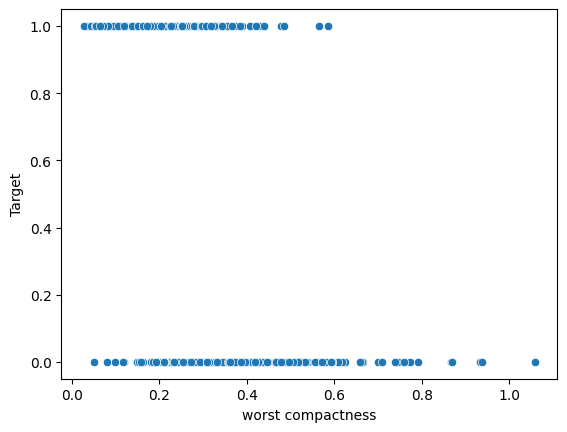

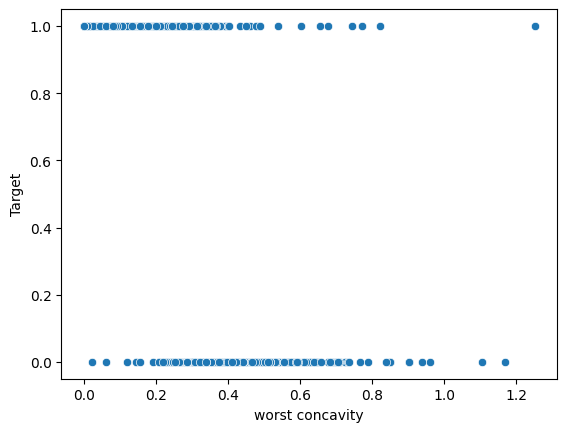

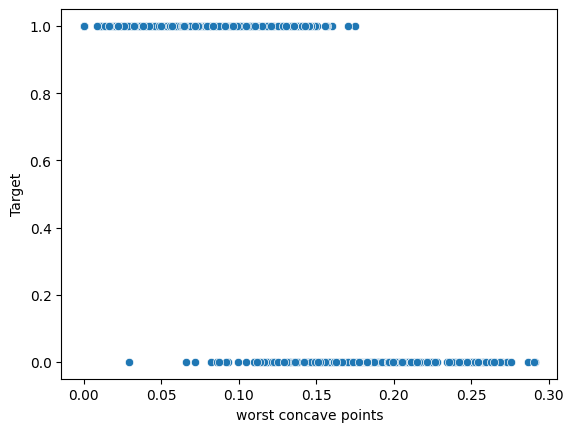

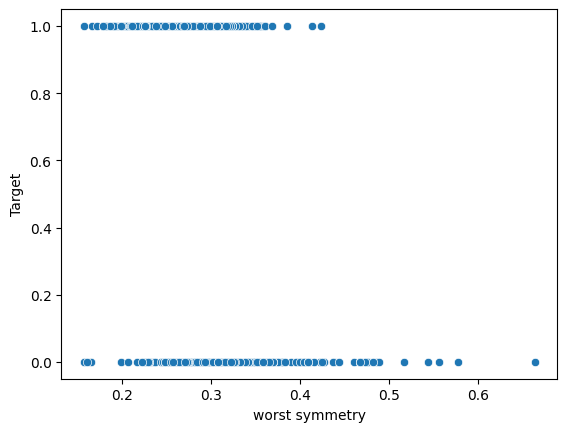

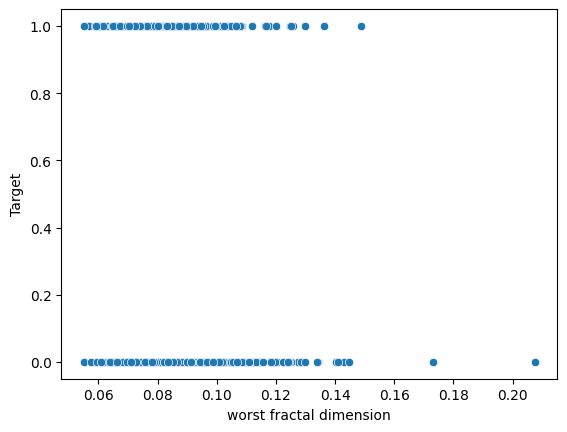

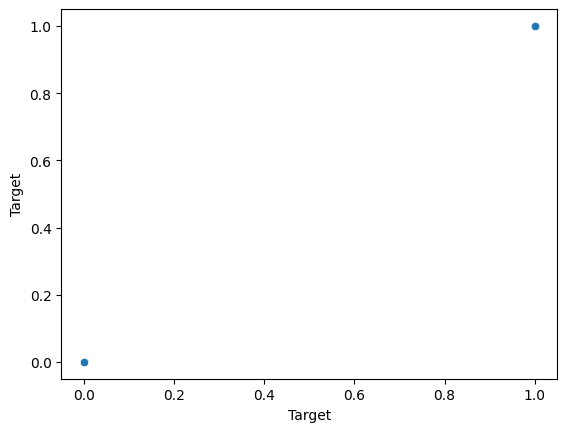

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [22]:
x_train, x_test, y_train, y_test=eda(df_cancer,'Target')


[ 0.34351135 -0.04801247 -0.15048116 -0.06169356 -0.00923318  0.21752687
 -0.14410512 -0.05350958 -0.02457252  0.00524273 -0.2015764  -0.01268428
  0.14120651  0.01035403 -0.02575953 -0.02425488  0.08698707 -0.03066503
 -0.02925493  0.05953784 -0.79862882 -0.00668598 -0.14553154  0.6412344
 -0.01904582 -0.02462497 -0.04804723 -0.06935042  0.00193507 -0.09471364]
0.6373626373626371
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Mean Absolute Error: 0.1976420747223574
Mean Squared Error: 0.06462030506289136
Root Mean Squared Error: 0.25420524200513916


(array([ 0.22679212,  0.81077975,  0.98084002,  0.80068987,  0.96765246,
         0.91974591,  1.05073582,  0.97227211,  1.09708963,  1.07635347,
         0.72658552,  0.7643809 ,  1.27304542,  0.70636981,  0.62812712,
         0.21499475,  1.04267545,  0.09973831,  0.13418174, -0.1285267 ,
         0.04784891,  0.32658558,  0.8307249 ,  0.97190326,  0.24768799,
         0.94718396,  1.10108626,  0.32958073,  0.92810512,  0.02450828,
         1.03919938,  0.19075134,  0.67173532,  0.39537388,  1.28921647,
         0.0939452 ,  0.74440176,  0.3405336 ,  0.7738262 ,  0.01919545,
         0.41518808,  1.17048945,  0.48965666,  1.17531222,  0.5931423 ,
        -0.27401383,  1.36919891,  0.80239527,  0.98867349, -0.06028005,
         0.56278973,  0.64531451,  0.18540071,  0.91602002,  0.96310477,
         0.93386206,  1.04527449,  0.78315363,  0.86458183,  0.02317142,
         0.1293304 ,  0.19418026,  1.16610257,  0.88911266,  0.03479851,
         0.71903758, -0.5903536 , -0.32570798,  0.1

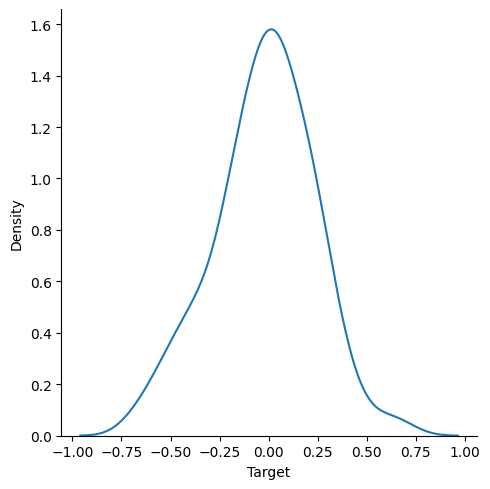

In [23]:
LinearReg(x_train, x_test, y_train, y_test)


In [24]:
from sklearn.datasets import load_linnerud
from sklearn.metrics import mean_squared_error, mean_absolute_error

linnerud=load_linnerud()
df_linnerud = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
features = pd.DataFrame(linnerud.target, columns=linnerud.target_names)  # Age, Weight, Waist
target = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)  # Chins, Situps, Jumps

# Use age, weight, and waist as features to predict 'chins'
X = features[['Weight', 'Waist']]
y = target['Chins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 20.11
Mean Absolute Error (MAE): 4.07


[33.69316081 32.12187776 29.43247986 75.31140259  7.17892898 10.29594417
 76.33123133  9.42421196  5.16218721 58.29257431]
-0.005247343488916367
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Mean Absolute Error: 0.07773328130097608
Mean Squared Error: 0.009511914910418967
Root Mean Squared Error: 0.0975290464960002


(array([  42.73885064,   74.89638556,   -4.02252446, -295.66331686,
          44.51380597,   21.72531812, -146.62325296,  -60.65949017,
         -15.41550242,  176.52388226, -325.91892577,  -56.77952288,
          46.18275707,  -88.90669785,  127.2756737 , -134.15333081,
         -63.11303019,   47.06772008,   92.59536698,  -40.86059958,
         128.21645014,  239.26171795,  191.76805875, -129.77894188,
         184.1314981 , -123.91509636, -246.90015181,  250.08034264,
          41.50176536,  225.92721431,  221.55715599, -135.10847732,
          37.27944517,   70.94265938,  -52.47029437, -183.80502086,
          44.96433771,  -36.45700835,   26.88956436, -101.57954509,
          57.03130189,  -26.1698596 ,   26.0667339 ,   89.62878606,
         -81.16104679,  -31.08176986,  -81.96976931, -151.78959956,
         168.77552336, -124.71716053,  -35.25506952,  188.86284507,
         286.98305329,  -80.68769419,  -41.84124351,  -98.72485639,
         156.07269368,   62.39677011,   81.34191

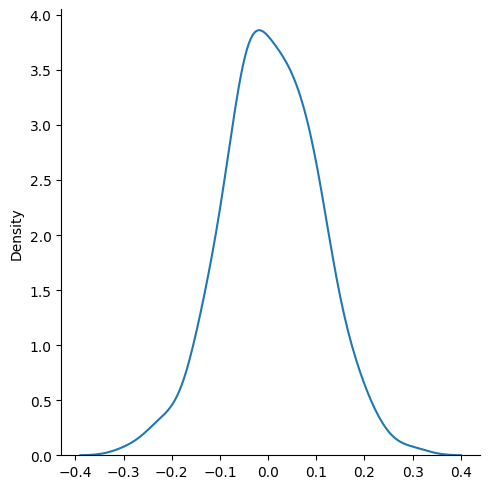

In [25]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LinearReg(X_train, X_test, y_train, y_test)


In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digits['Target'] = digits.target  # add target column to the dataframe
df_digits.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


           pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
pixel_0_0        0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
pixel_0_1        0.0   0.822997   2.400995   0.801020  -0.072969   0.312419   
pixel_0_2        0.0   2.400995  22.608374  11.317044  -1.717201   1.173873   
pixel_0_3        0.0   0.801020  11.317044  18.052657   0.436071  -4.126031   
pixel_0_4        0.0  -0.072969  -1.717201   0.436071  18.381696  12.334882   
...              ...        ...        ...        ...        ...        ...   
pixel_7_4        0.0  -0.458120  -3.161335  -1.382688  -1.737254  -9.817273   
pixel_7_5        0.0  -0.159895  -1.155440  -1.377286  -5.459585  -8.988024   
pixel_7_6        0.0   0.098514   1.412036   0.928746  -4.396696  -6.204002   
pixel_7_7        0.0  -0.074062   0.729880   0.647843  -1.717423  -1.767883   
Target           0.0  -0.134736  -0.161259  -0.139871   1.238304   3.139421   

           pixel_0_6  pixel_0_7  pixel_1_0  pixel_1

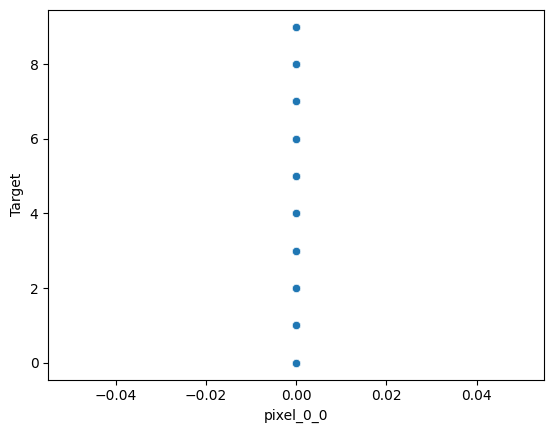

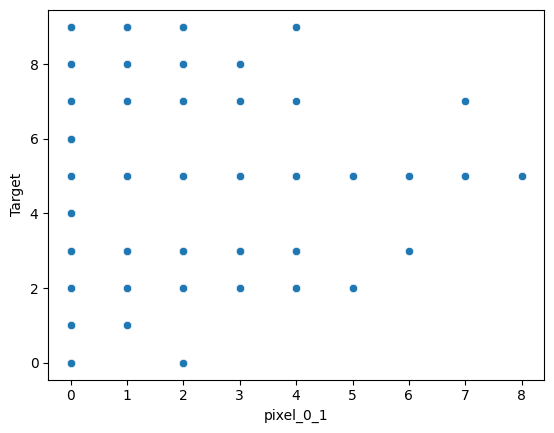

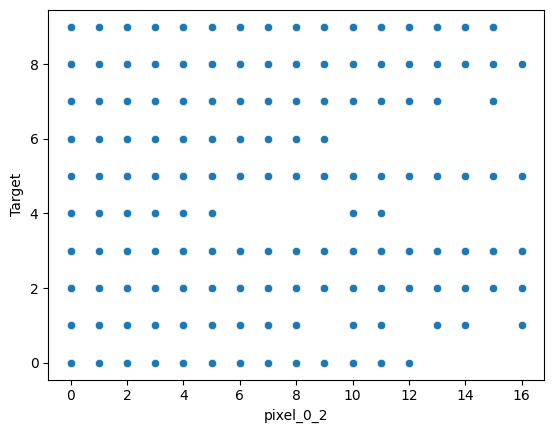

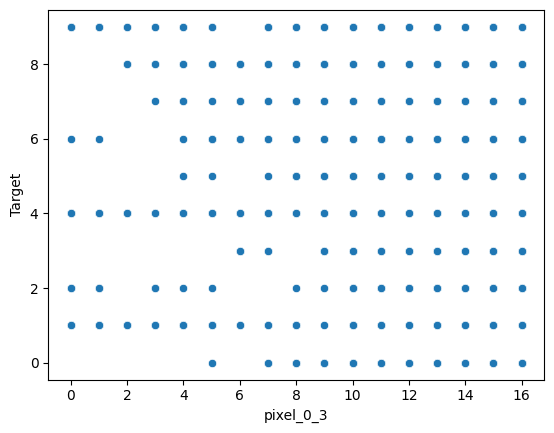

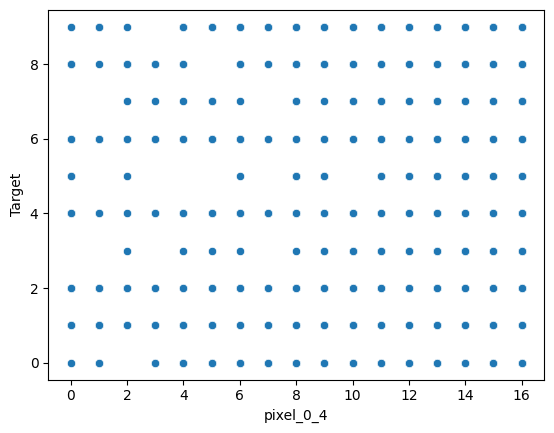

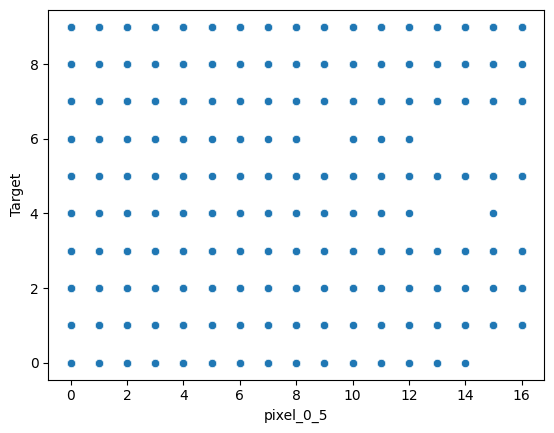

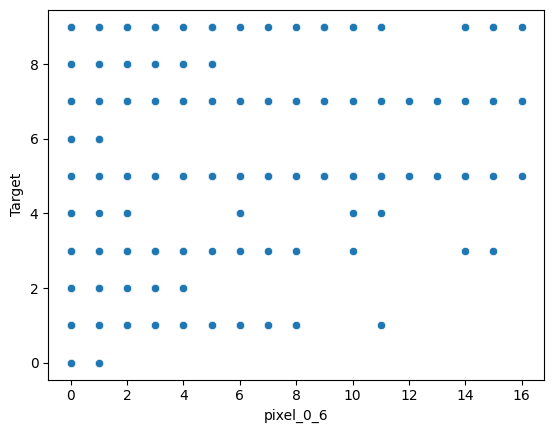

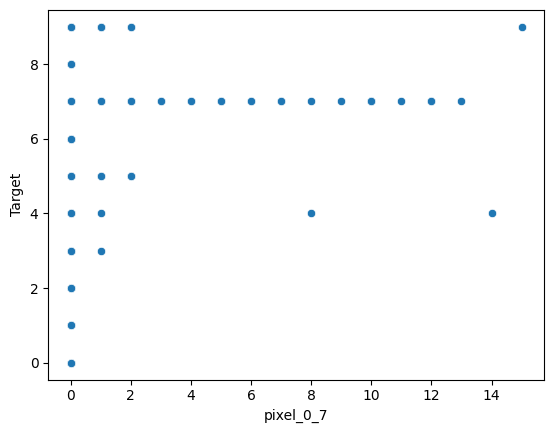

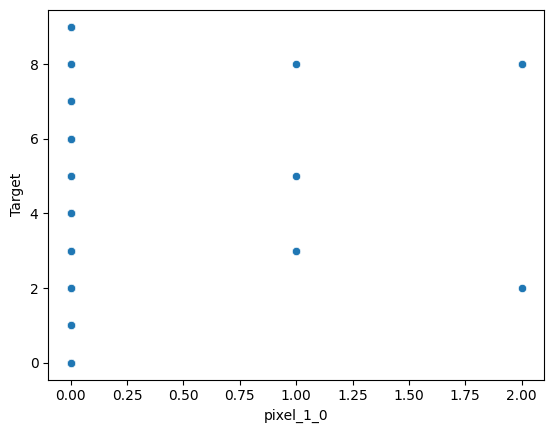

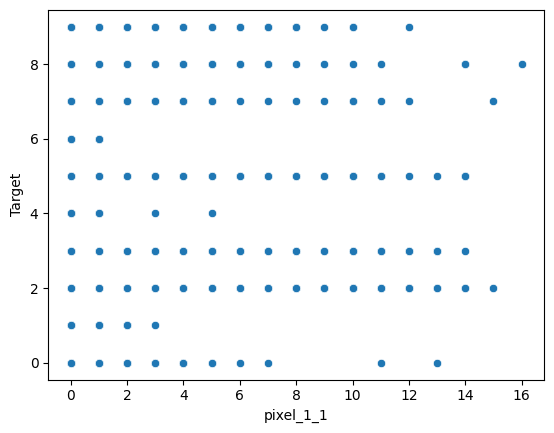

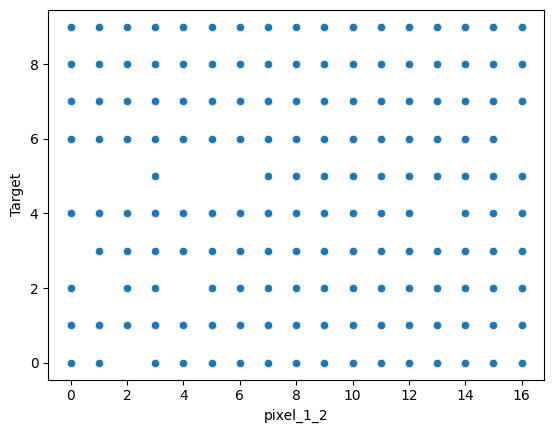

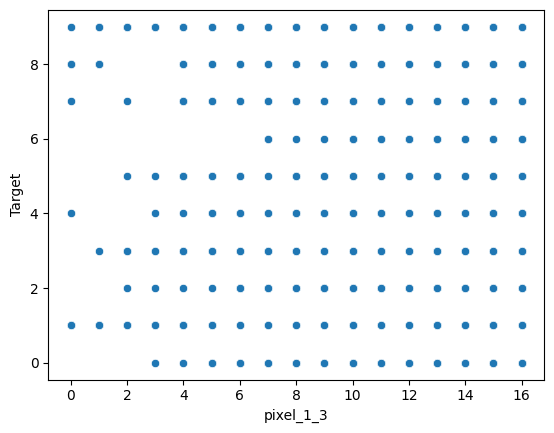

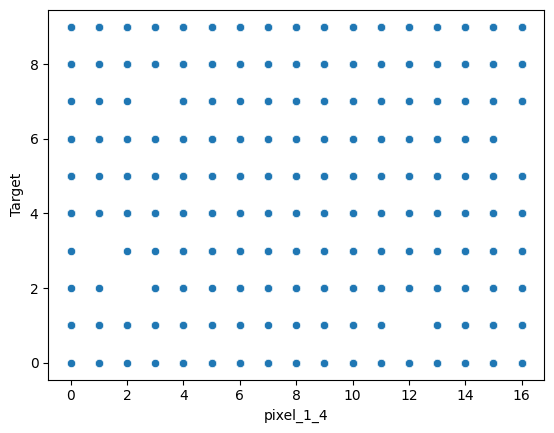

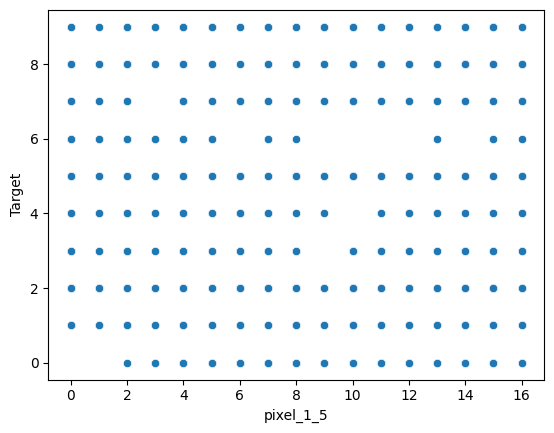

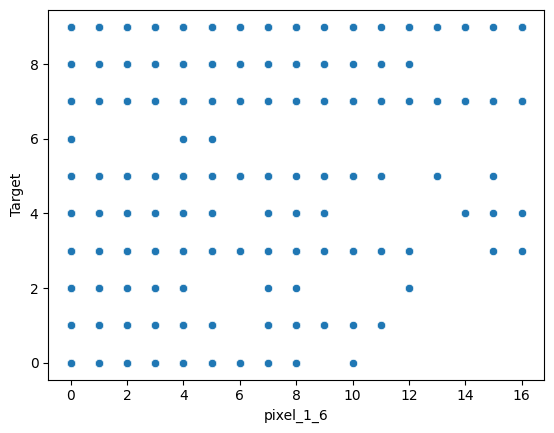

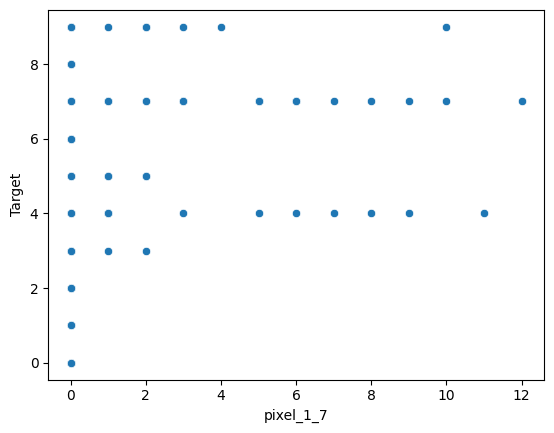

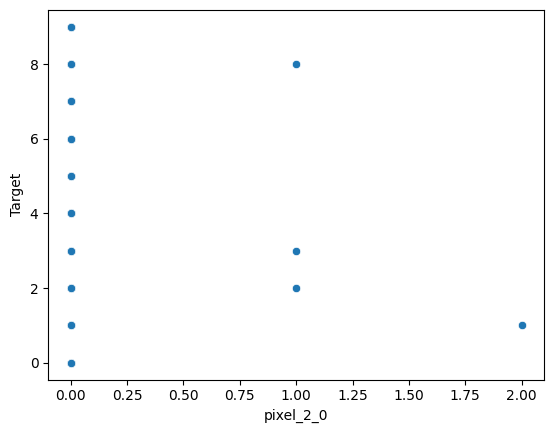

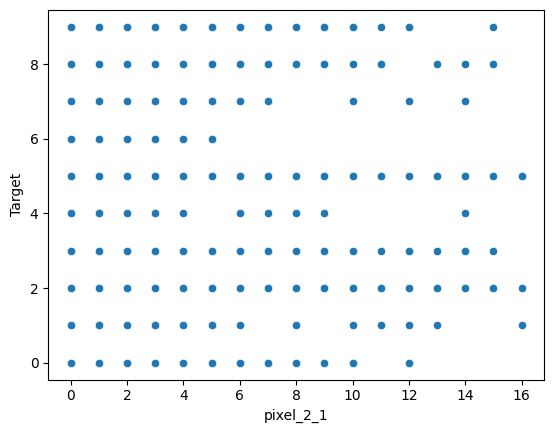

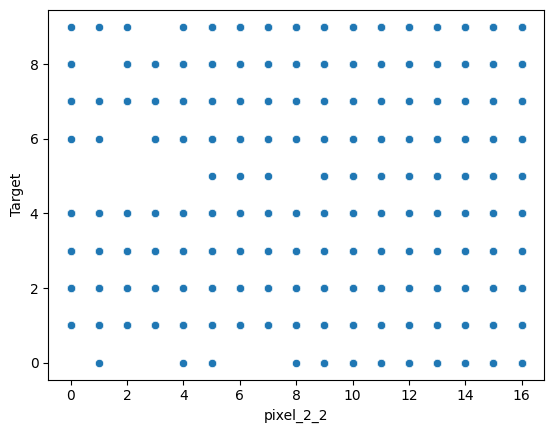

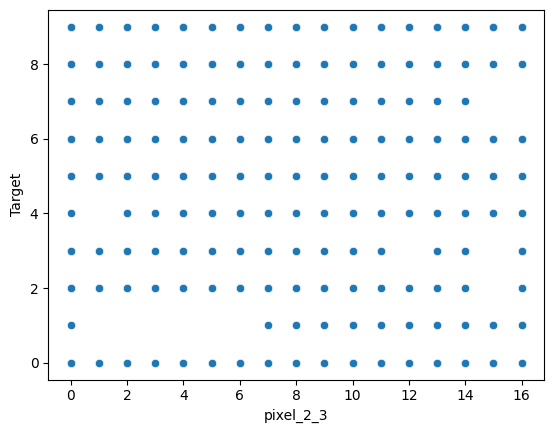

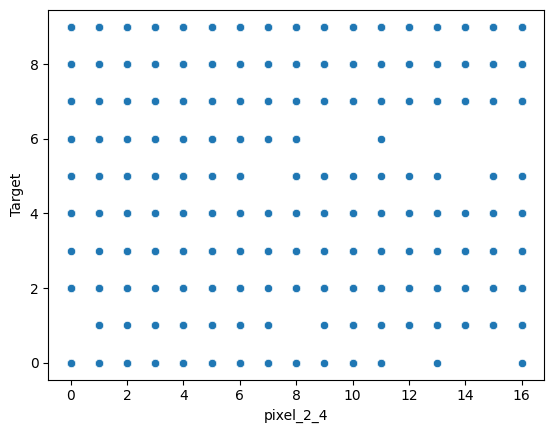

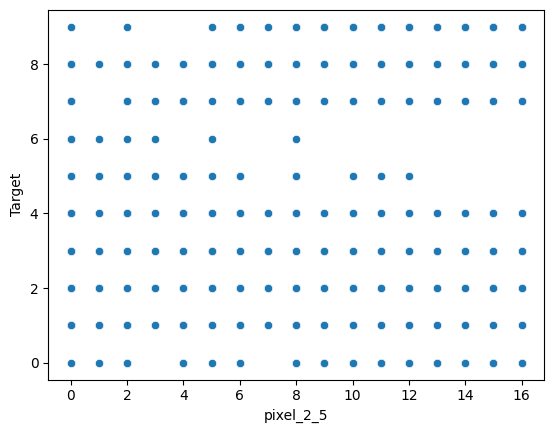

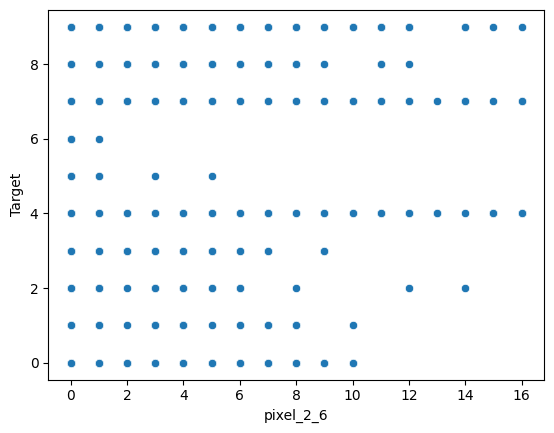

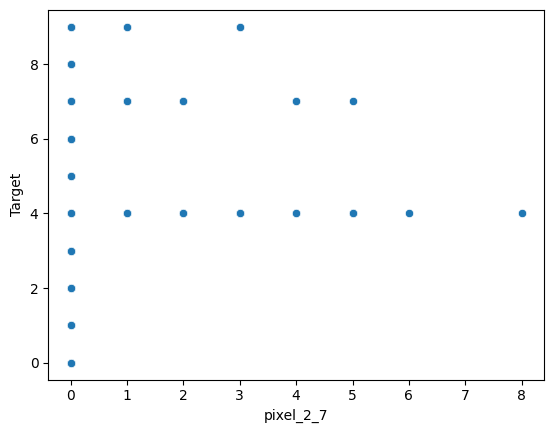

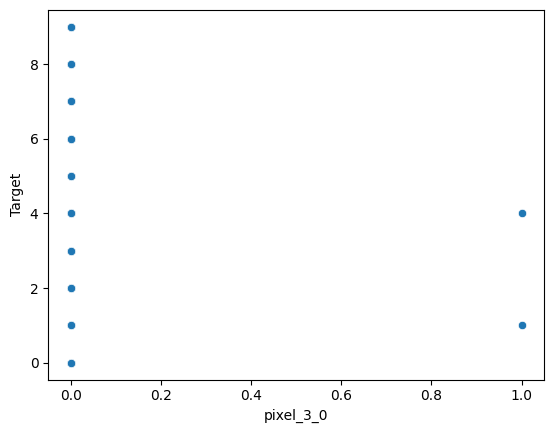

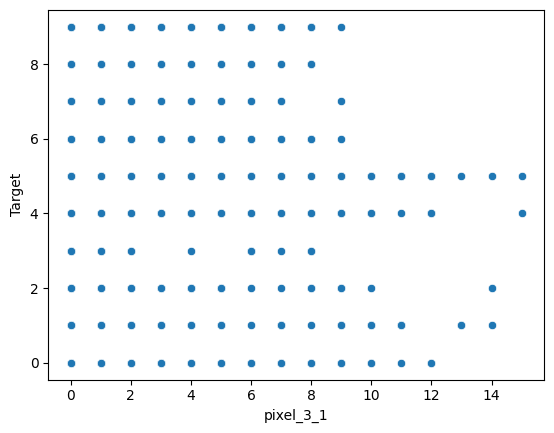

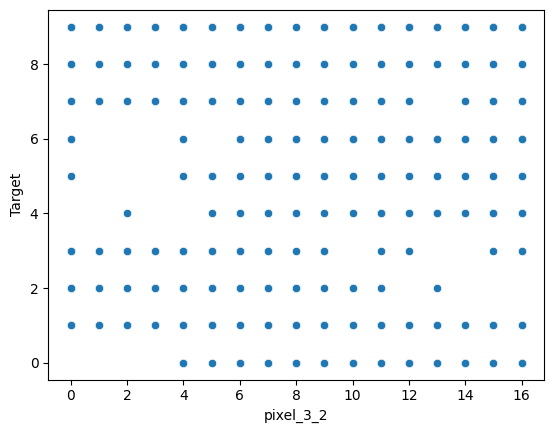

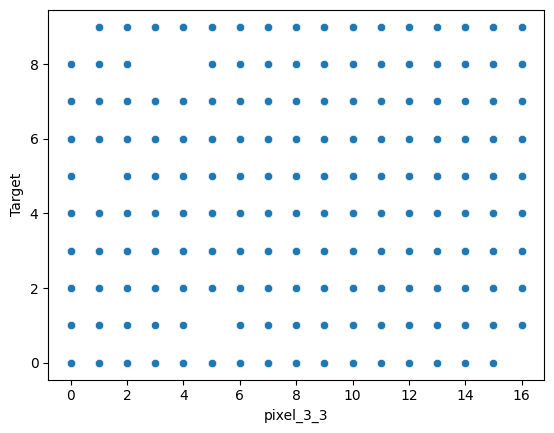

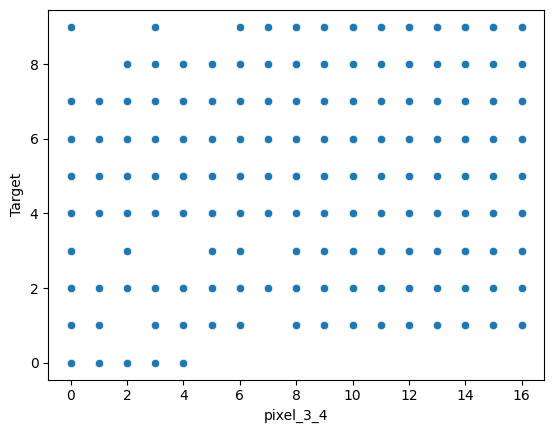

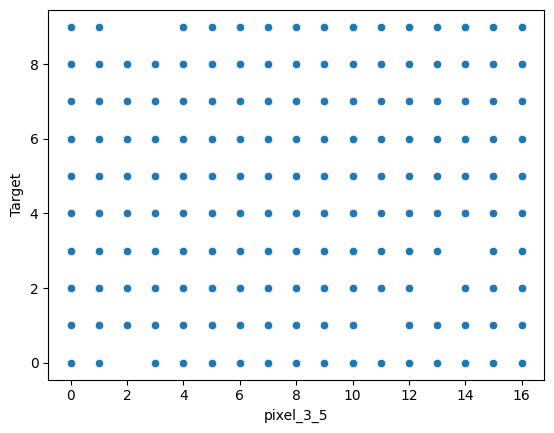

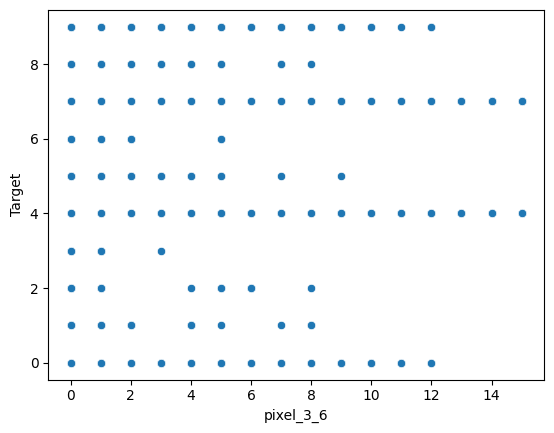

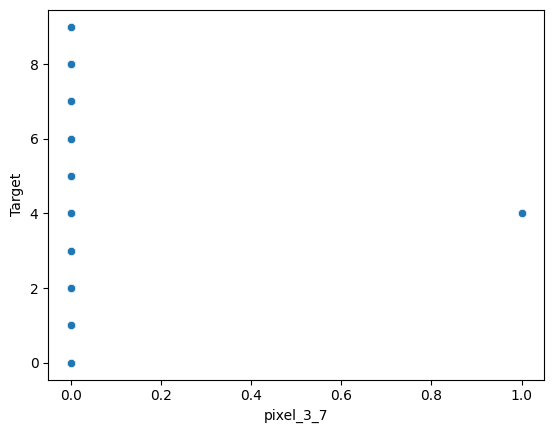

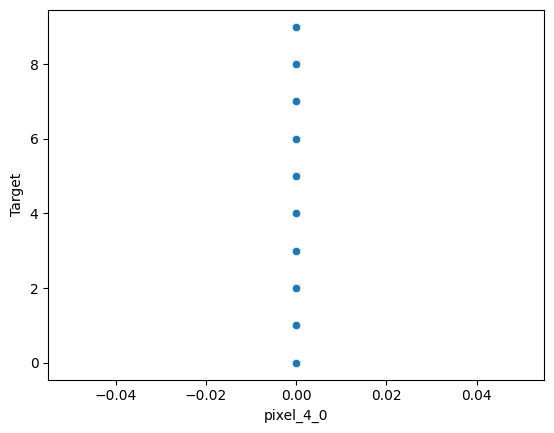

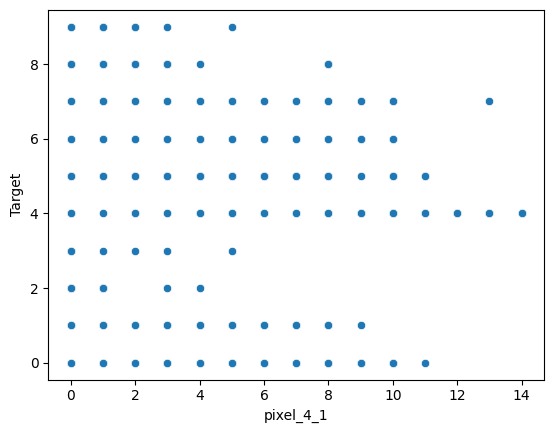

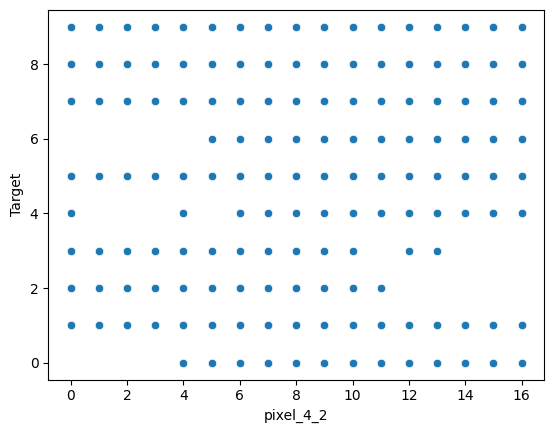

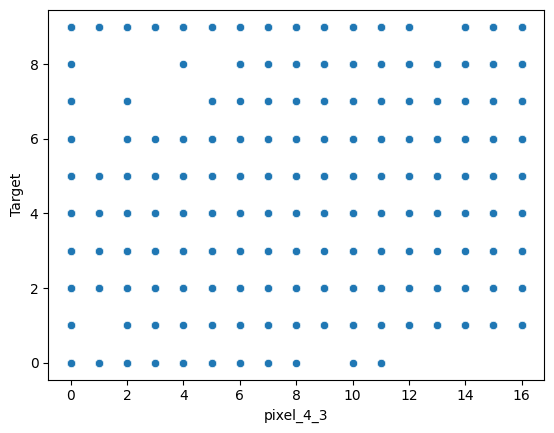

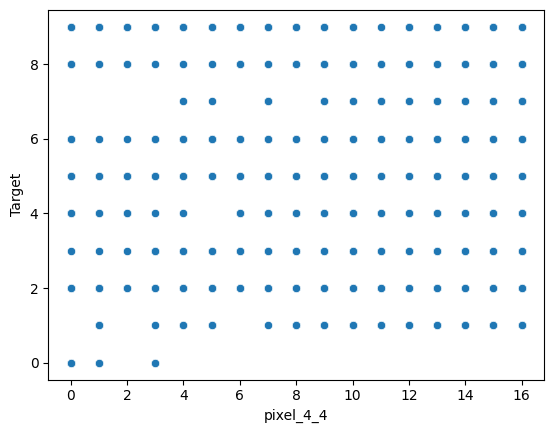

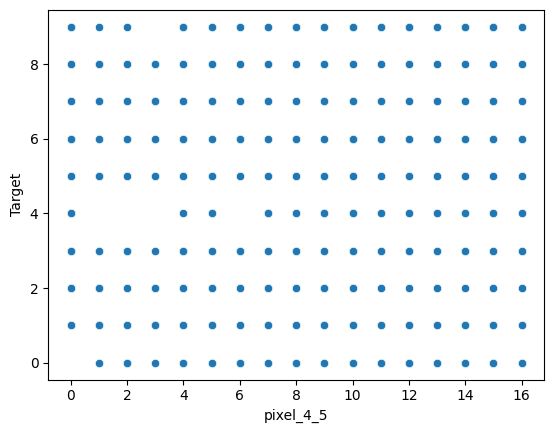

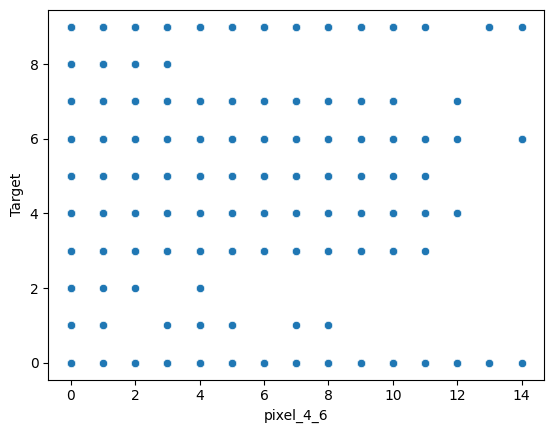

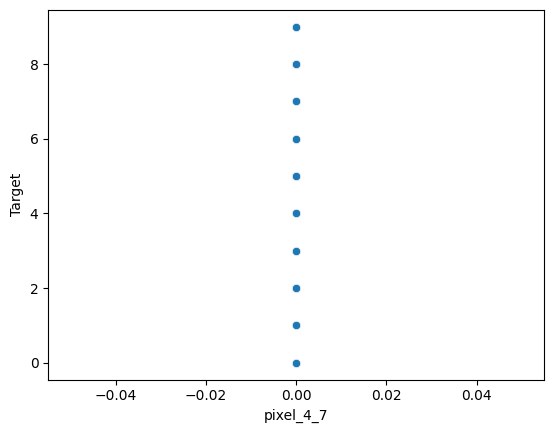

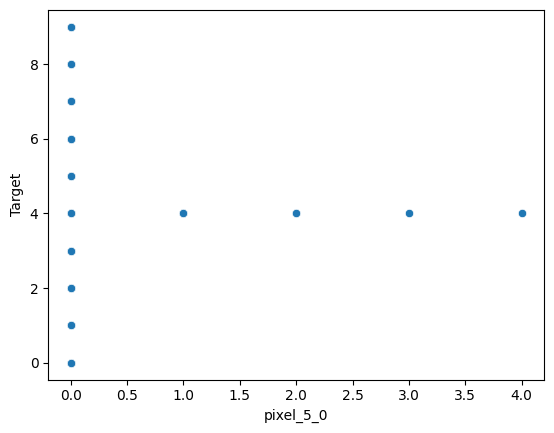

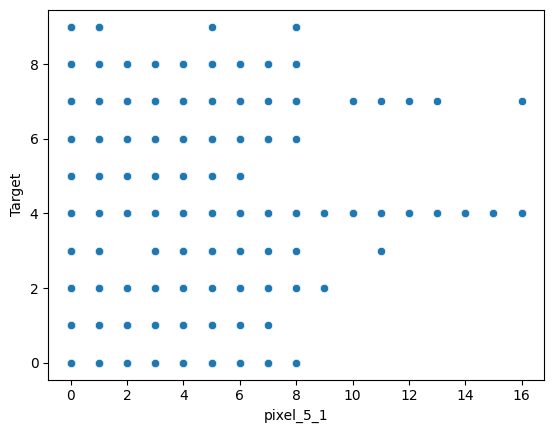

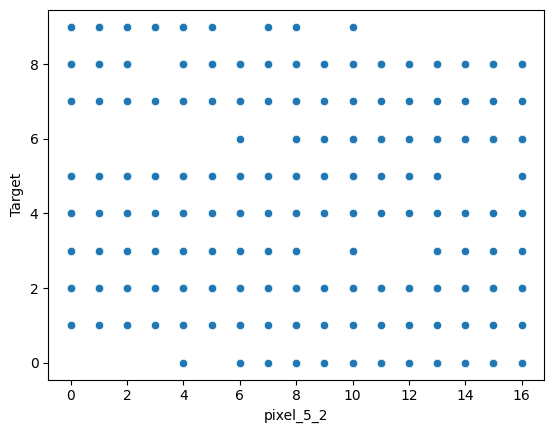

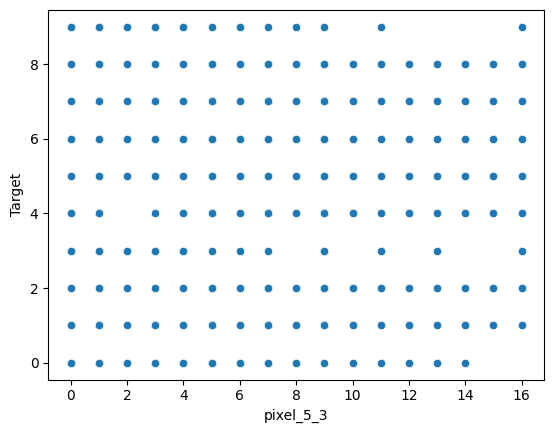

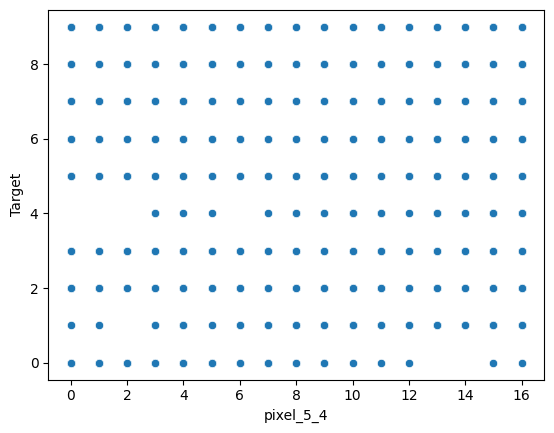

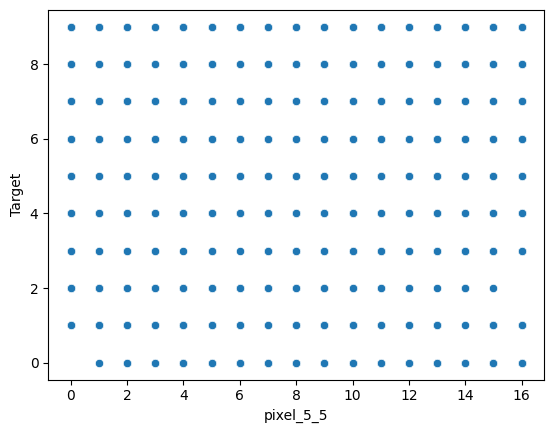

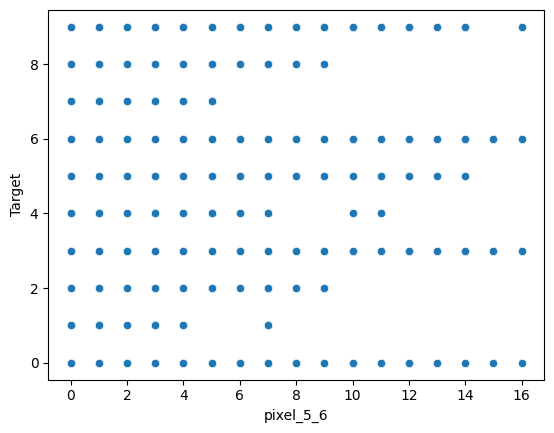

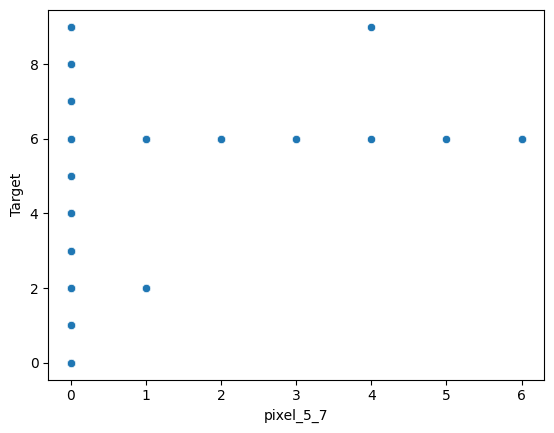

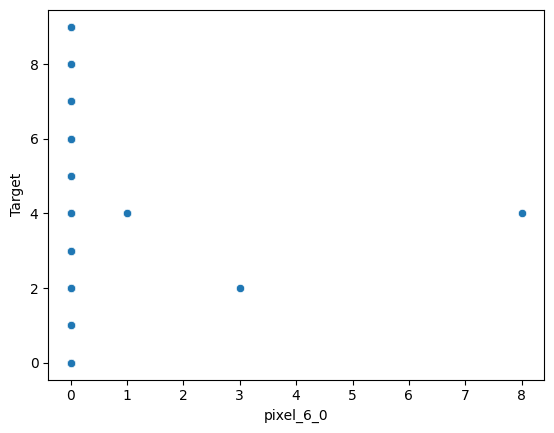

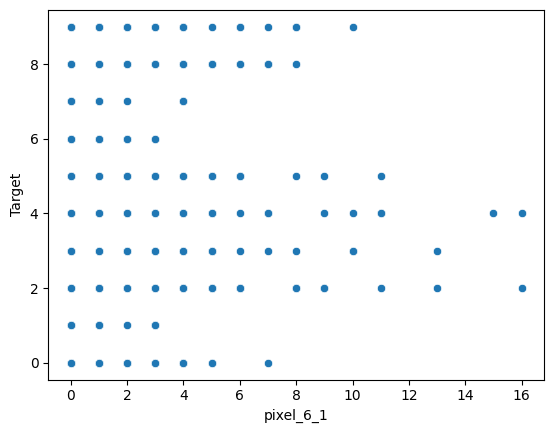

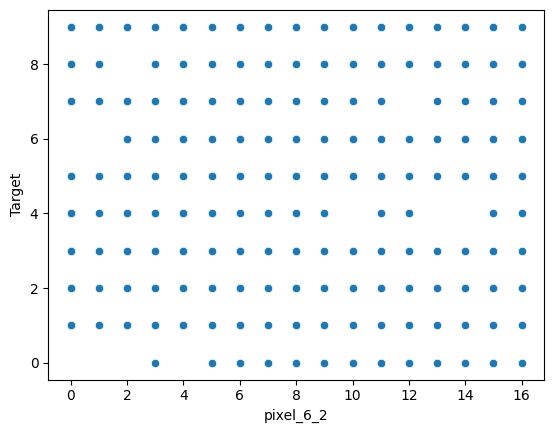

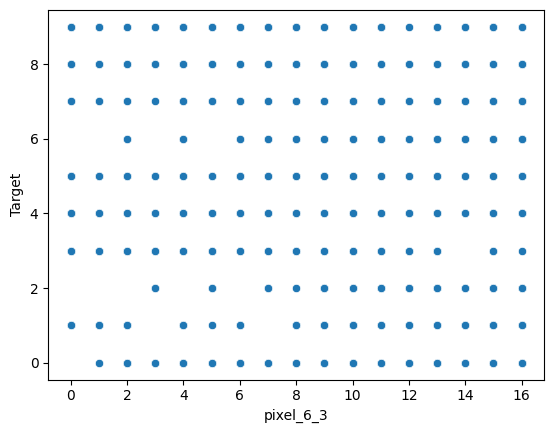

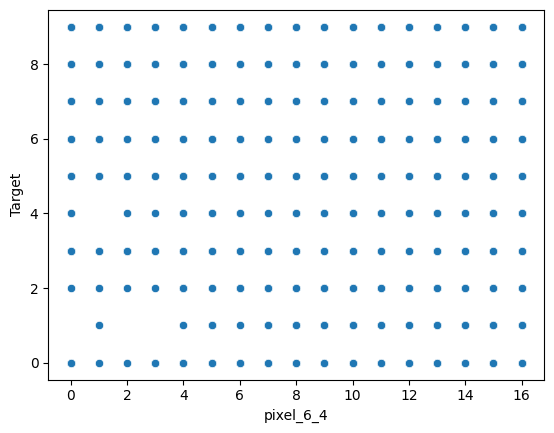

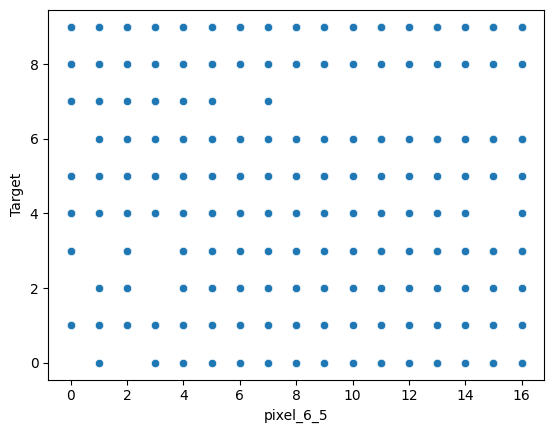

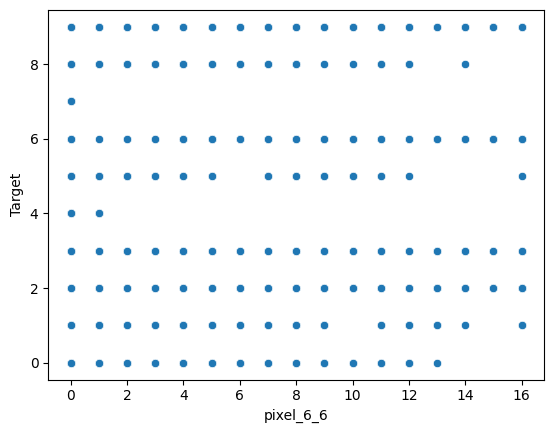

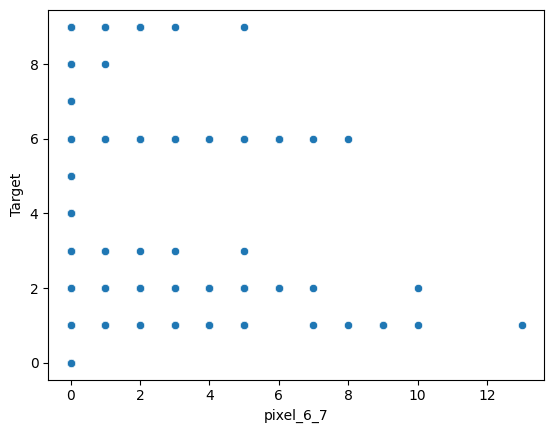

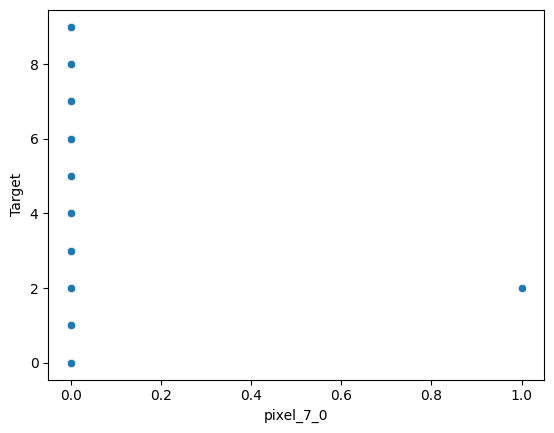

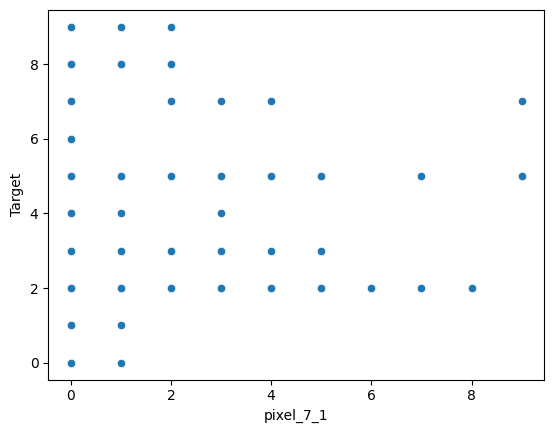

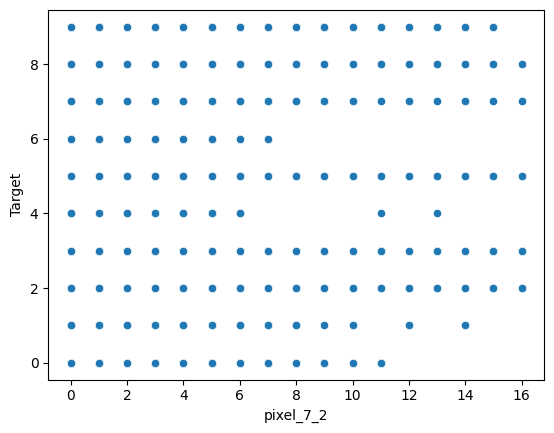

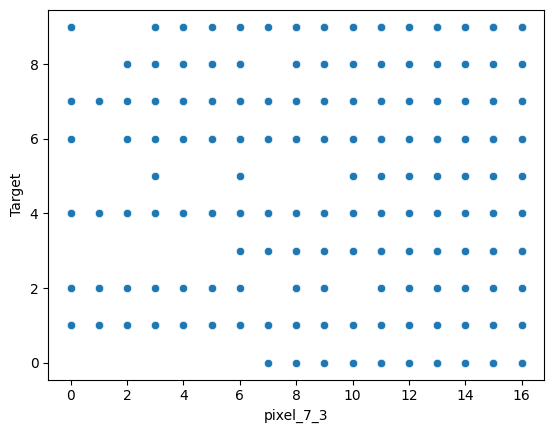

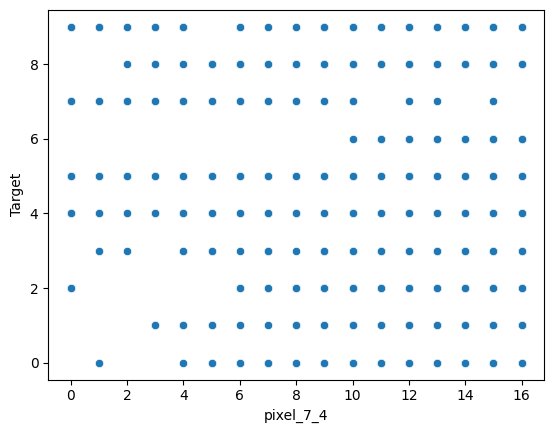

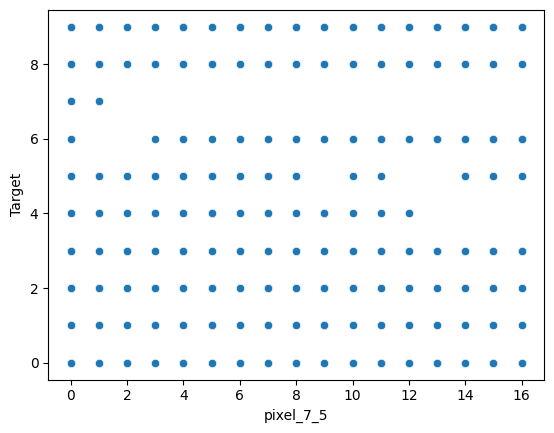

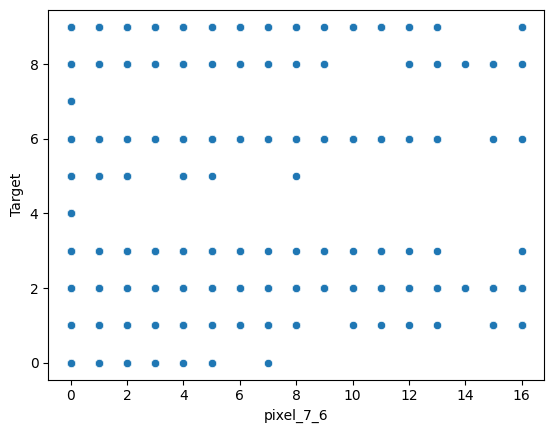

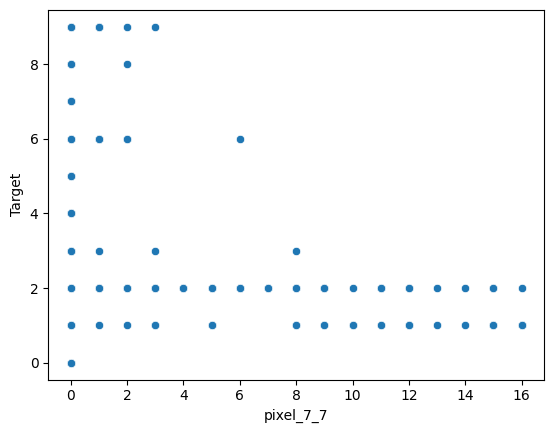

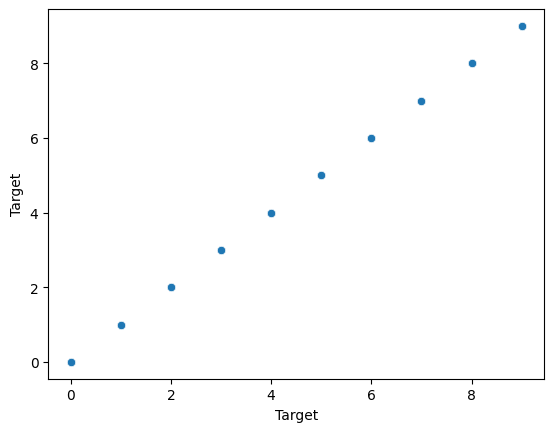

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0

In [27]:
x_train, x_test, y_train, y_test=eda(df_digits,'Target')    


[ 5.26898056e-17  1.10447954e-01 -6.25753904e-02 -6.09950120e-02
  2.90588159e-01 -1.61448673e-02 -1.18107517e-01 -1.71665265e-02
  6.21211705e-02 -5.96750966e-02  5.93077139e-01  1.25391413e-01
 -3.24096646e-01 -4.16335254e-01  3.45069408e-01  1.76506272e-01
  4.24957381e-02  4.95496450e-02  4.80453041e-01 -2.04410039e-01
 -4.24127185e-01  2.54847247e-01 -1.62531900e-01 -1.23177562e-01
  4.77872273e-03 -4.88663381e-01  2.68498093e-01  5.22481445e-01
  4.42053006e-01  4.89724833e-01 -4.22699307e-02 -1.26696448e-01
 -2.77555756e-16 -5.36759076e-01 -1.60886134e-01  8.06767611e-01
 -2.56535674e-01  1.72488942e-01  4.37878411e-02 -2.22044605e-16
 -8.60599303e-03  3.24470413e-01 -8.08443941e-02 -4.26583484e-02
  7.29638345e-01  3.17701443e-01 -3.66701215e-02  4.17520170e-02
  1.30695194e-01  1.15938933e-01 -9.12959333e-02 -3.03696241e-01
 -1.08764200e+00 -2.42236820e-01  5.35089450e-01 -1.36608736e-01
 -4.11071260e-02 -1.51327545e-01  3.09671403e-02 -3.64464734e-01
 -2.98049041e-02 -4.18630

(array([ 1.45937706e+00,  7.12712235e+00,  2.13001151e+00,  5.82048326e+00,
         4.18204807e+00,  5.09427570e+00,  2.02342834e+00,  6.17248758e+00,
         7.62587862e+00,  5.45541138e+00,  2.62098418e+00,  4.43712982e+00,
         6.51219256e+00,  5.03315945e+00,  4.86604715e+00,  6.18499925e+00,
         8.62491880e-01,  7.74416491e-01,  4.34979374e+00,  9.48894922e+00,
         9.12509693e+00,  5.93381610e+00,  7.91389939e+00,  3.87079008e+00,
         7.73345282e+00,  3.97422202e+00,  4.01264650e+00,  8.51410110e+00,
         3.24702703e+00,  8.25716438e+00,  4.10028587e+00,  5.66018061e+00,
         4.84563178e+00,  3.80615543e+00,  6.67215817e+00,  4.14552257e+00,
         4.80567650e+00,  4.45950265e+00,  1.28862938e+00,  2.32432274e+00,
         6.34115472e+00,  4.44958732e+00,  6.96683142e+00,  7.67587608e+00,
         4.48385870e+00,  2.42892689e+00,  4.86040367e+00,  3.26871063e+00,
         3.30768607e+00,  3.15688423e+00,  6.24298798e+00,  5.85151116e+00,
         6.1

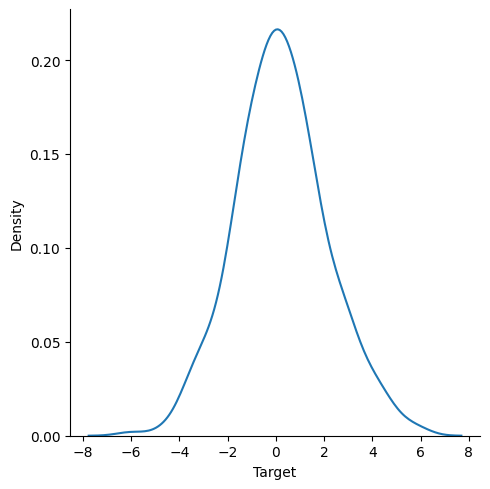

In [28]:
LinearReg(x_train, x_test, y_train, y_test)


In [29]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
airquality_data = pd.read_csv('Air_Quality Missing Data.csv')
airquality_data.head()


,Date,Ozone,Solar,Wind,Temp
0,01-05-1976,41.0,190.0,7.4,67
1,02-05-1976,36.0,118.0,8.0,72
2,03-05-1976,12.0,149.0,12.6,74
3,04-05-1976,18.0,313.0,11.5,62
4,05-05-1976,NaN,NaN,14.3,56


In [31]:
StudentsPerformance = pd.read_csv('Students Performance.csv')  
StudentsPerformance.head() 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
AutoMPG = pd.read_csv('MPG.csv')  
AutoMPG.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
